In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os,sys, gc
import keras

dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)
from pre_process import clean_LC,generate_representation
from evaluation import calculate_metrics, evaluate_metadata, evaluate_metadata_raw


folder = "../../KOI_Data/"
folder_lc = "/work/work_teamEXOPLANET/KOI_LC/"

Using TensorFlow backend.
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/users/fmena/anaconda3/

### Load Metadata and pre-process

In [2]:
def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta = pd.read_csv(folder+"/kepler_dataset.csv")
all_labels = df_meta["NExScI Disposition"]
mask_conf = (all_labels=="CONFIRMED").values
mask_fp = (all_labels=="FALSE POSITIVE").values
mask_cand = (all_labels=="CANDIDATE").values

df_meta.head()

Kepler ID   KOI Name  Kepler Name  KOI Number Kepler Disposition  \
0     757450  K00889.01  Kepler-75 b      889.01          CANDIDATE   
1     892772  K01009.01          NaN     1009.01     FALSE POSITIVE   
2    1025986  K07621.01          NaN     7621.01     FALSE POSITIVE   
3    1026032  K06252.01          NaN     6252.01     FALSE POSITIVE   
4    1026957  K00958.01          NaN      958.01          CANDIDATE   

  NExScI Disposition    RA (J2000)  RA Error   Dec (J2000)  Dec Error  \
0          CONFIRMED  19 24 33.024       0.0  +36 34 38.57        0.0   
1     FALSE POSITIVE  19 24 36.811       0.0  +36 40 43.83        0.0   
2     FALSE POSITIVE  19 24 08.086       0.0  +36 46 15.75        0.0   
3     FALSE POSITIVE  19 24 10.577       0.0  +36 43 45.38        0.0   
4          CANDIDATE  19 25 01.078       0.0  +36 44 37.00        0.0   

                   ...                    Contamination Flag  Insolation Flux  \
0                  ...                                     0            83.21   
1                  ...                                     0           119.70   
2                  ...                                     0             2.00   
3                  ...                                     0            98.60   
4                  ...                                     0            13.18   

   Insolation Flux err1  Insolation Flux err2  Fitted Stellar Density  \
0                 16.69                -13.87                11.62061   
1                 48.69                -36.91                 0.88510   
2                  0.92                 -0.76                33.55994   
3                 52.46                -21.18                 0.73874   
4                  3.00                 -1.98               102.86534   

   Fitted Stellar Density err1  Fitted Stellar Density err2  Planetary Fit  \
0                      0.20683                     -0.40258        LS+MCMC   
1                      0.10080                     -0.39457        LS+MCMC   
2                     16.58298                    -31.53180        LS+MCMC   
3                      0.00021                     -0.00735        LS+MCMC   
4                      5.47239                    -30.25813        LS+MCMC   

   Disposition Score                              File Name  
0              0.999  kplr000757450-20160128150956_dvt.fits  
1              0.000  kplr000892772-20160128150956_dvt.fits  
2              0.000  kplr001025986-20160128150956_dvt.fits  
3              0.000  kplr001026032-20160128150956_dvt.fits  
4              1.000  kplr001026957-20160128150956_dvt.fits  

[5 rows x 153 columns]

In [3]:
df_sets = pd.read_csv(folder+"/koi_sets.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values

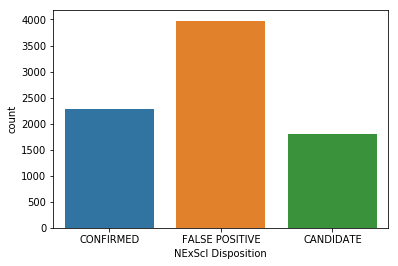

In [4]:
sns.countplot(df_meta["NExScI Disposition"])

### Read light curves processed (detrended)

(8054, 71427)


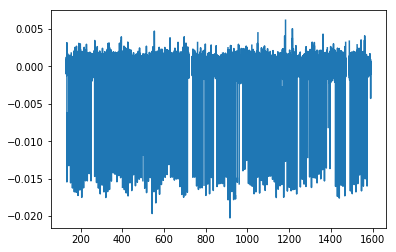

In [5]:
time_kepler = np.load(folder_lc+"npy/KOI_LC_time.npy")
#lc_kepler = np.load(folder_lc+"npy/KOI_LC_init.npy" )
process_lc = np.load(folder_lc+'/cleaned/LC_kepler_processed.npy')
N, T = time_kepler.shape
print((N,T))

plt.plot(time_kepler[0],process_lc[0])
plt.show()

## Generate representation
> Continous values (with zeros)  
>> **Selected:** Coupled values (adding time) + delta time

In [6]:
for i in range(N):
    if i%1000 == 0:
        print("Va en el ",i)
    time_kepler[i], process_lc[i] = generate_representation(time_kepler[i], process_lc[i])

Va en el  0
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423941 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampli

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423942 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423943 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423944 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform samplin

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423945 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423946 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform samplin

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423947 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
Va en el  6000
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.42394

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423948 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423949 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
Va en el  7000
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.42395

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform samplin

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old le

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423950 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old le

Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423951 (mins)
Old length: 71427
New length: 71427
Assuming uniform samplin

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************M

***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is b

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old le

New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423952 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
Va en el  8000
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
*

New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423954 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old length: 71427
New length: 71427
Assuming uniform sampling
***************Mask values to get uniform sampling rate is being done..
New sampling rate: 0.020433 (JD) --- 29.423953 (mins)
Old le

In [7]:
#borrar nans... arreglo variable
coupled_lc = []
coupled_time = []
delta_time = []
for i in range(N):
    mask_nan_aux = np.isnan(process_lc[i])
    coupled_lc.append(process_lc[i][~mask_nan_aux])
    
    time = time_kepler[i][~mask_nan_aux]
    # calculate delta time --> this could be done after padding is done..
    delta_time.append(np.hstack([[0],np.diff(time)]))
    coupled_time.append(time)
    
coupled_lc = np.asarray(coupled_lc)
coupled_time = np.asarray(coupled_time)
delta_time = np.asarray(delta_time)
coupled_time

array([array([ 131.5127147 ,  131.53314799,  131.55358129, ..., 1590.94020852,
       1590.96064181, 1590.98107511]),
       array([ 352.39660231,  352.4374689 ,  352.45790219, ..., 1590.94020562,
       1590.96063891, 1590.98107221]),
       array([ 131.59444527,  131.61487856,  131.63531186, ..., 1590.94021392,
       1590.96064722, 1590.98108051]),
       ...,
       array([ 131.5119643,  131.5323976,  131.5528309, ..., 1590.940063 ,
       1590.9604963, 1590.9809296]),
       array([ 131.5119643,  131.5323976,  131.5528309, ..., 1590.940063 ,
       1590.9604963, 1590.9809296]),
       array([ 131.5119548,  131.5323881,  131.5528214, ..., 1590.9400577,
       1590.960491 , 1590.9809243])], dtype=object)

### Process --scale and center
> center?  
> With what value scale? (min, iqr, std)  
> Multiplicar por -1 por los max pooling?
>> **Selected:** normalizar (unit variance) --already median centered 

In [8]:
#pre-process seleccionado

coupled_lc_scaled = []
for i in range(coupled_lc.shape[0]):
    std_i = coupled_lc[i].std(keepdims=True)
    coupled_lc_scaled.append( coupled_lc[i]/std_i )
coupled_lc_scaled = np.asarray(coupled_lc_scaled)
coupled_lc_scaled.shape

(8054,)

In [9]:
#flip/mirror cada curva de luz.. (así se duplican los datos..) time: tambn y shift del 0 que sobra..

flip_coupled_lc_scaled = []
flip_delta_time = []
for i in range(coupled_lc.shape[0]):    
    flip_coupled_lc_scaled.append( coupled_lc_scaled[i][::-1] )
    flip_delta_time.append(  np.hstack([[0], delta_time[i][1:][::-1]]) )
    
flip_coupled_lc_scaled = np.asarray(flip_coupled_lc_scaled)
flip_delta_time = np.asarray(flip_delta_time)


delta_time = np.concatenate([flip_delta_time,delta_time])
coupled_lc_scaled = np.concatenate([flip_coupled_lc_scaled,coupled_lc_scaled])

del flip_delta_time, flip_coupled_lc_scaled
gc.collect()
coupled_lc_scaled.shape

(16108,)

### Padding for Keras

In [10]:
lens_lc = list(map(len,coupled_time))
max_len = np.max(lens_lc)

max_len = 64482 #as were builded


## do padding with keras..
X_time = keras.preprocessing.sequence.pad_sequences(delta_time,maxlen=max_len, value=0,dtype='float32',padding='post')
X_lc_scaled = keras.preprocessing.sequence.pad_sequences(coupled_lc_scaled,maxlen=max_len, value=0,dtype='float32',padding='post')
print("Shape with padding: ", X_lc_scaled.shape)

#need data with extra dim
X_lc_scaled = np.expand_dims(np.squeeze(X_lc_scaled),axis=-1)
X_time = np.expand_dims(np.squeeze(X_time),axis=-1)

T = X_lc_scaled.shape[1]
channels = 2
print("Shape with extra-dim: ", X_lc_scaled.shape)
X_lc_scaled

Shape with padding:  (16108, 64482)
Shape with extra-dim:  (16108, 64482, 1)


array([[[-0.08730856],
        [-3.0120108 ],
        [ 0.06760287],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 1.4177376 ],
        [ 0.9873312 ],
        [ 0.47320434],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-5.59171   ],
        [-7.2887034 ],
        [-5.905621  ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       ...,

       [[-0.64256674],
        [ 1.0123966 ],
        [-0.7615765 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.5733981 ],
        [ 1.0870113 ],
        [-0.70451933],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[-0.02199254],
        [-0.17757921],
        [ 1.0298682 ],
        ...,
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]]], dtype=float32)

### Load Encoder

In [14]:
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Conv1D, Dense, Flatten, MaxPool1D, Reshape, UpSampling1D, Lambda, AveragePooling1D
from keras.layers import GlobalAveragePooling1D,GlobalMaxPool1D, TimeDistributed, GRU,LSTM, RepeatVector
from keras.layers import BatchNormalization, Dropout, ZeroPadding1D, ZeroPadding2D, Cropping1D, Cropping2D, Conv2D, Conv2DTranspose, MaxPool2D,UpSampling2D

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

keras.losses.mse_masked = keras.losses.mse

In [15]:
import os
names_mod = [file for file in os.listdir("models_det/") if ".h5" in file]
names_mod

['GRU_16U_5L_0D_0F_AEmodel.h5',
 'GRUT_16U_5L_0D_0F_AEmodel.h5',
 'GRUT_16U_5L_1D_0F_AEmodel.h5',
 'GRU_16U_5L_1D_0F_AEmodel.h5']

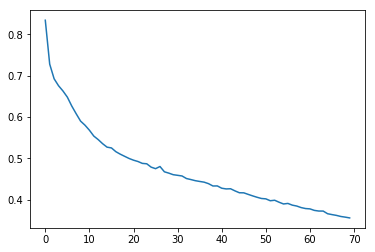

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
time_input (InputLayer)         (None, 64482, 1)     0                                            
__________________________________________________________________________________________________
lc_input (InputLayer)           (None, 64482, 1)     0                                            
__________________________________________________________________________________________________
Time_encoder (Model)            (None, 2015, 128)    136128      time_input[0][0]                 
__________________________________________________________________________________________________
LC_encoder (Model)              (None, 2015, 128)    136128      lc_input[0][0]                   
__________________________________________________________________________________________________
concatenat

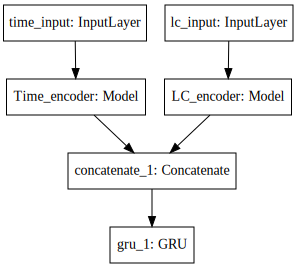

In [16]:
name_model= names_mod[0].replace("_AEmodel.h5","")

ae_model = keras.models.load_model("./models_det/"+name_model+"_AEmodel.h5")
values = np.loadtxt("./models_det/"+name_model+"_AEhist.txt")
plt.plot(values)
plt.show()

encoder_model = ae_model.get_layer("encoder")
encoder_model.summary()

SVG(model_to_dot(encoder_model).create(prog='dot', format='svg'))

In [11]:
keras.losses.mse_masked = keras.losses.mse

## comparacion entrenados..
name_model= "op4_grut" #op4_dtsimple

ae_model = keras.models.load_model("./models/"+name_model+"_AE.h5")
values = np.loadtxt("./models/"+name_model+"_hist.txt")
plt.plot(values)
plt.show()

encoder_model = ae_model.get_layer("encoder")
encoder_model.summary()
SVG(model_to_dot(encoder_model).create(prog='dot', format='svg'))

SystemError: unknown opcode

In [ ]:
## cambiar modelo de tiempo por la suma..

In [ ]:
### add time
new_inp = encoder_model.inputs
out_l = encoder_model.outputs[0]
out_t = encoder_model.get_layer("Time_encoder")(new_inp[0])
encoder_model = Model(new_inp , keras.layers.Concatenate(name='aux')([out_t, out_l]) )
encoder_model.summary()

SVG(model_to_dot(encoder_model).create(prog='dot', format='svg'))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64482, 1)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 64482, 8)          48        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 64482, 8)          328       
_________________________________________________________________
average_pooling1d_1 (Average (None, 32241, 8)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 32241, 16)         656       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 32241, 16)         1296      
_________________________________________________________________
average_pooling1d_2 (Average (None, 16120, 16)         0         
__________

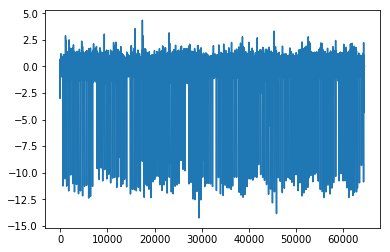

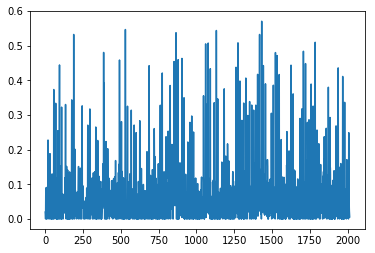

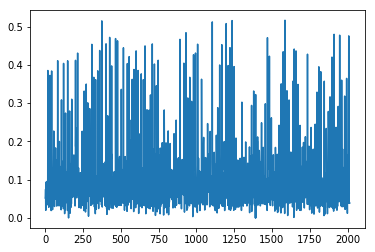

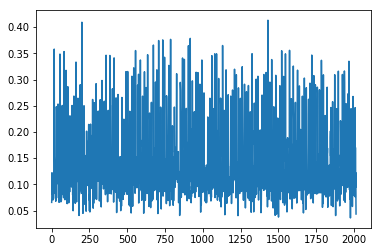

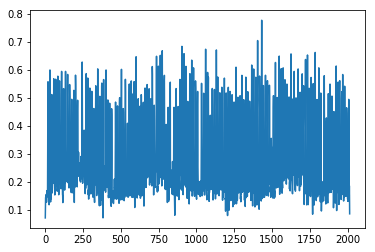

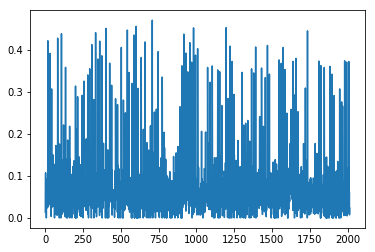

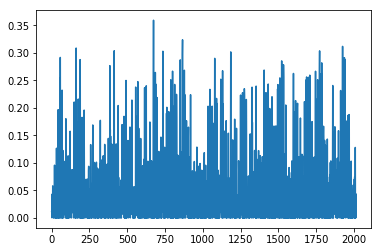

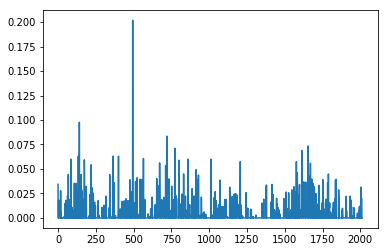

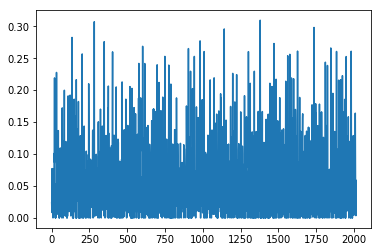

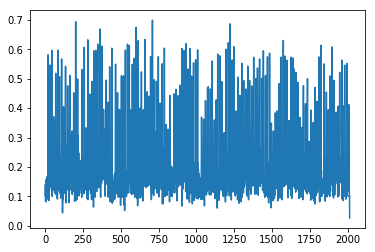

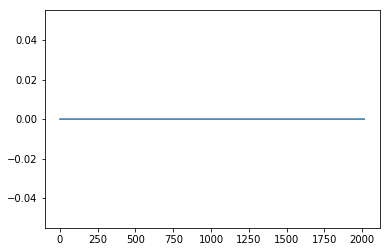

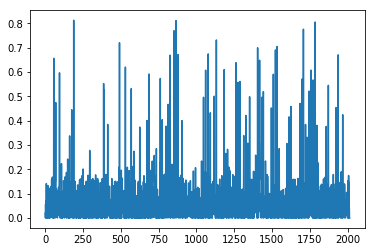

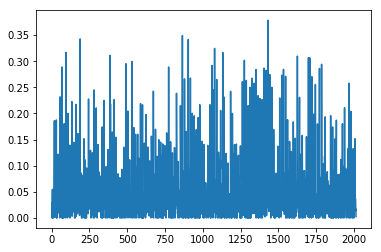

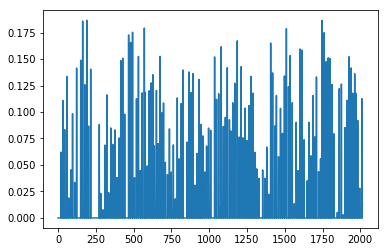

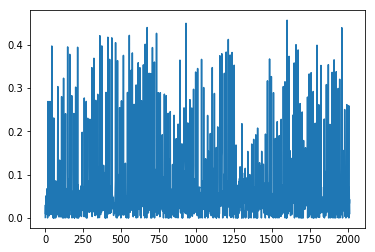

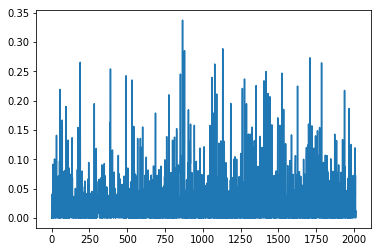

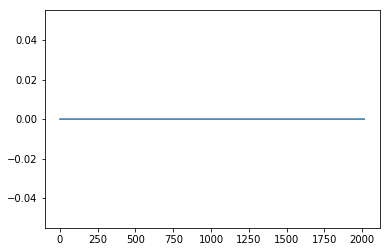

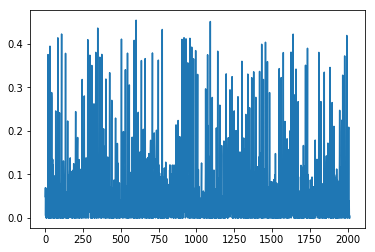

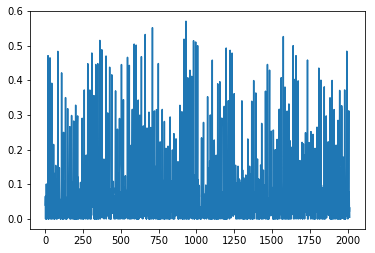

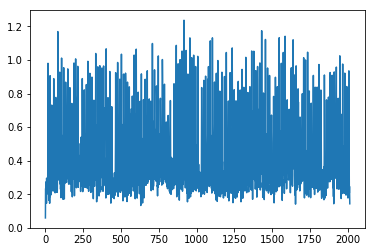

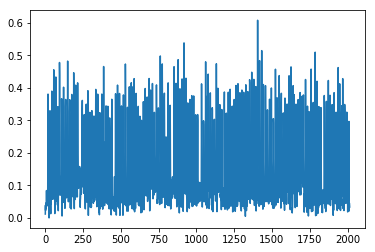

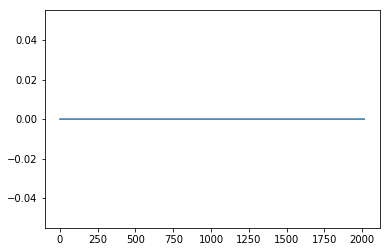

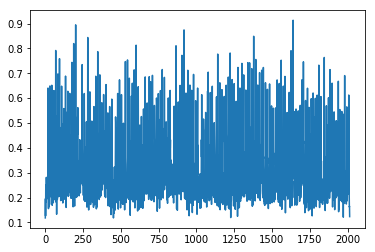

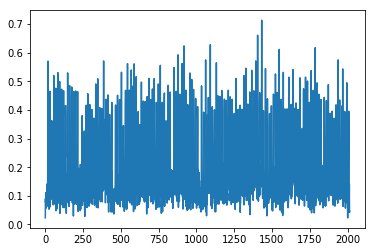

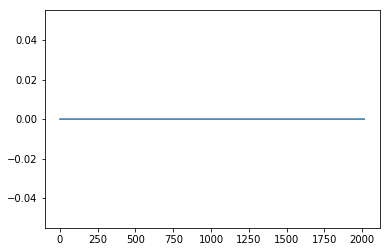

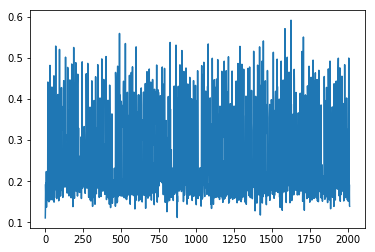

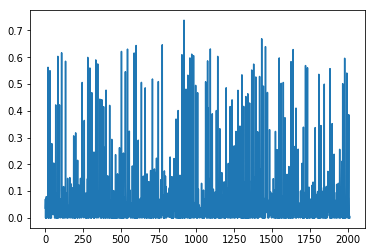

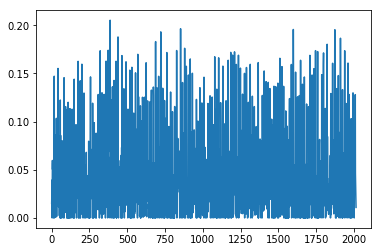

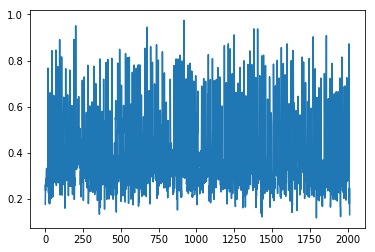

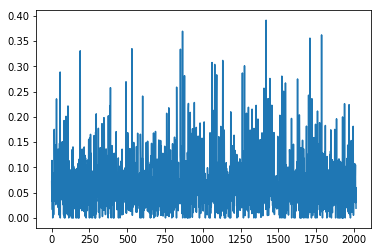

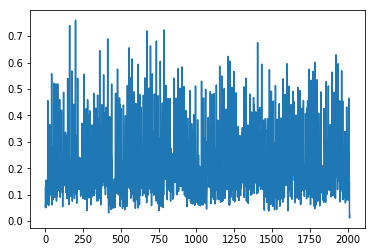

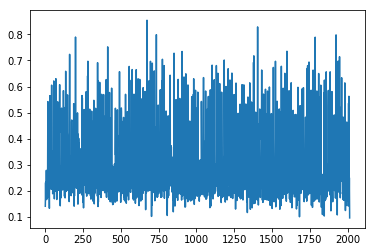

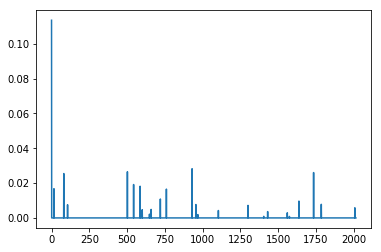

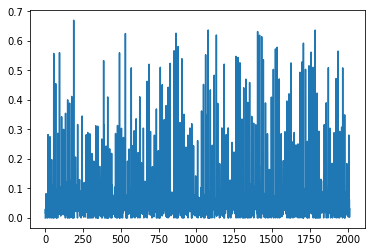

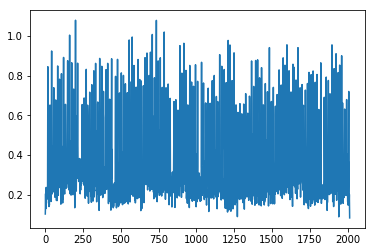

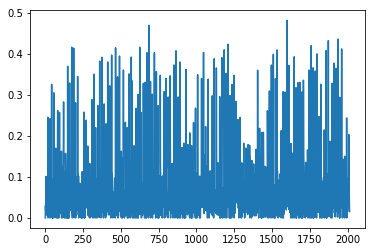

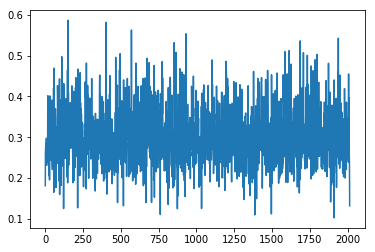

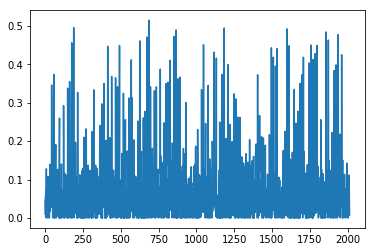

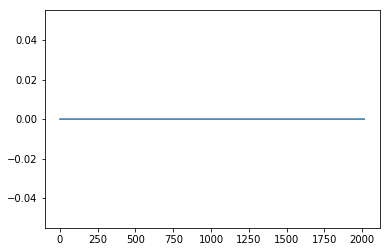

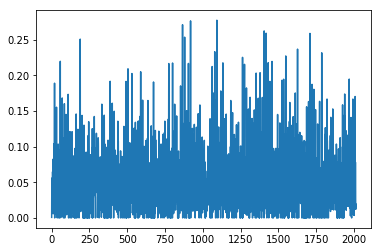

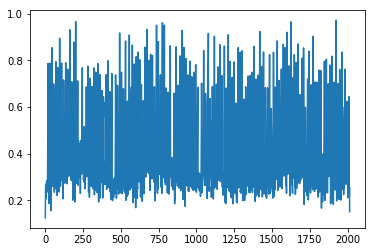

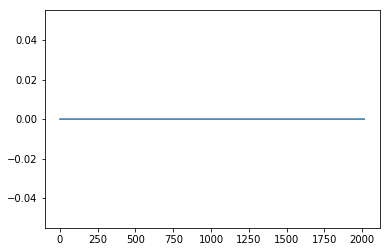

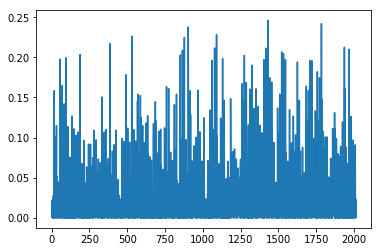

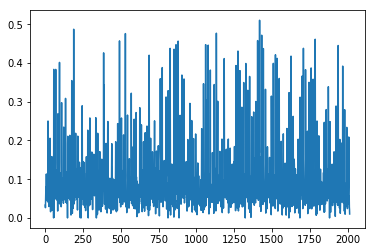

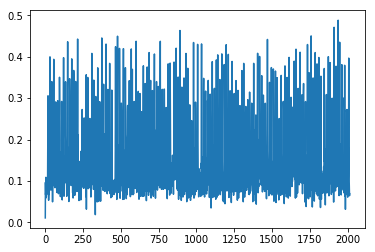

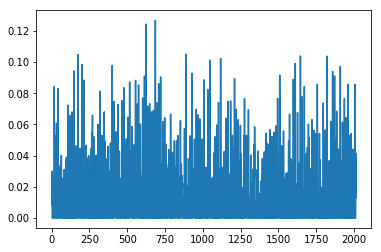

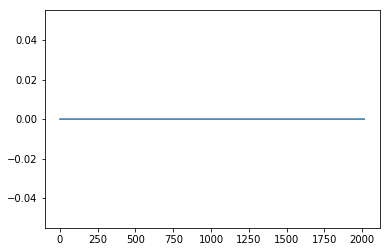

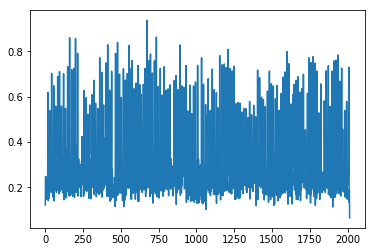

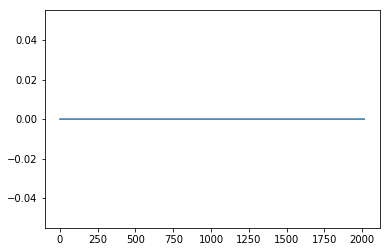

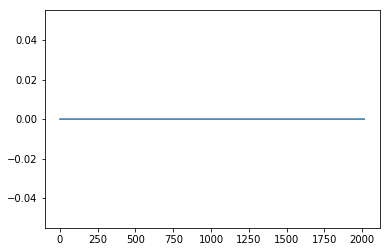

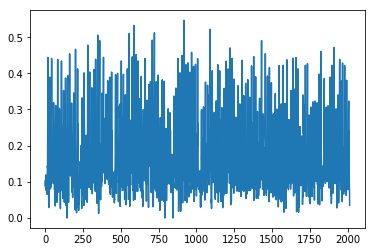

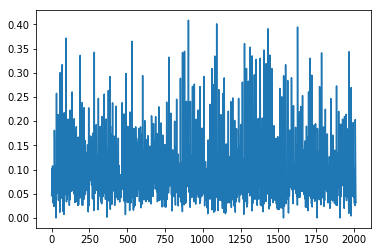

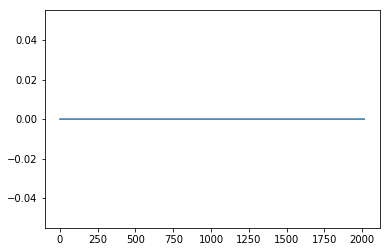

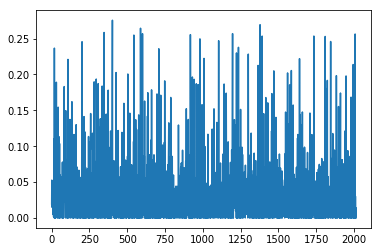

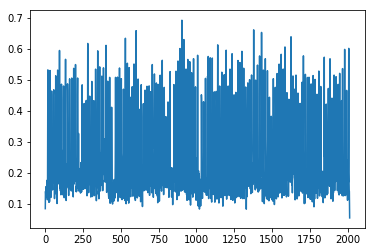

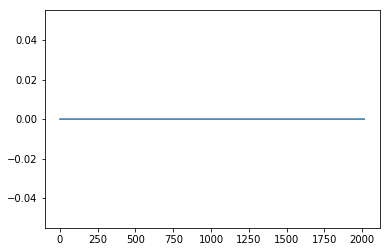

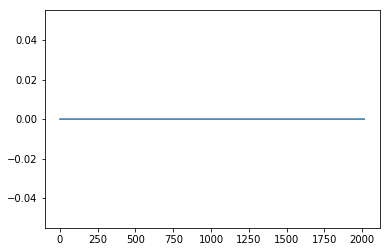

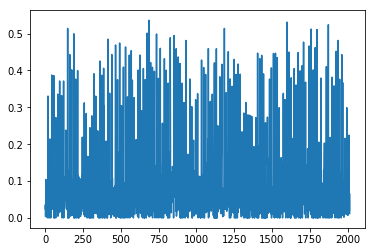

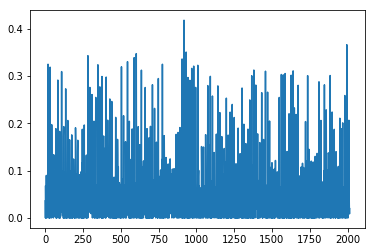

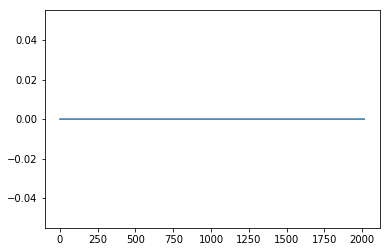

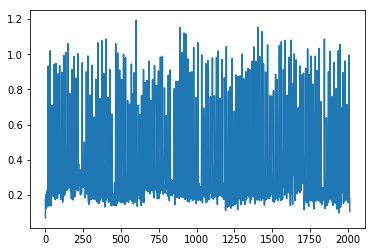

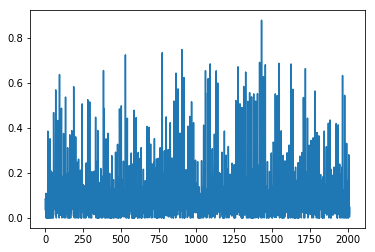

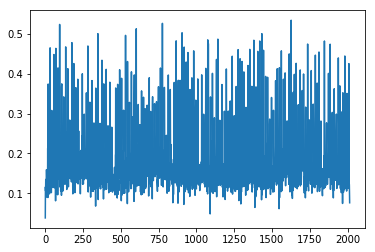

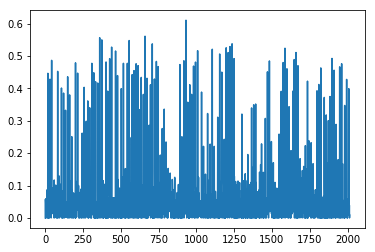

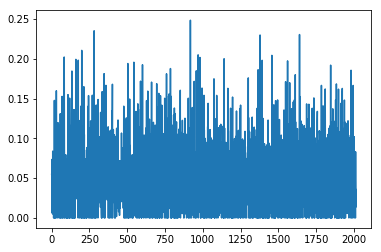

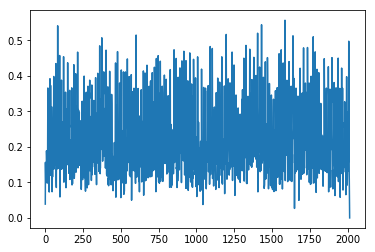

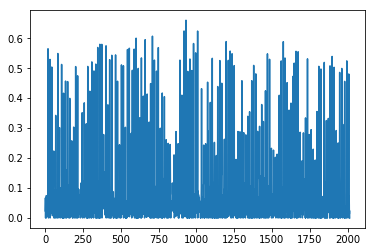

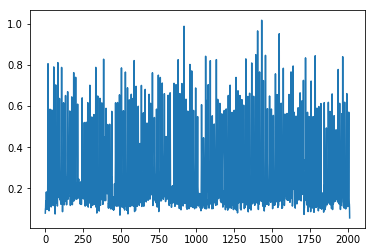

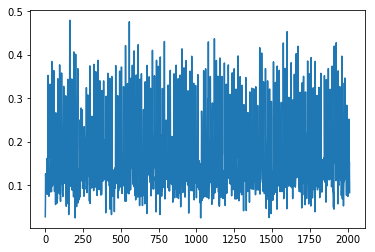

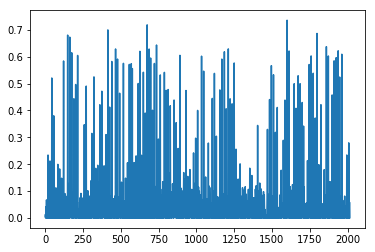

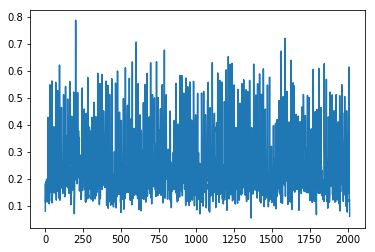

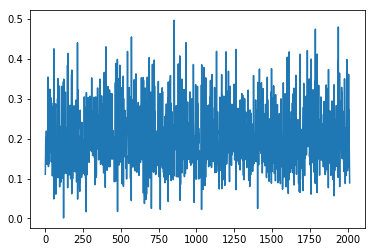

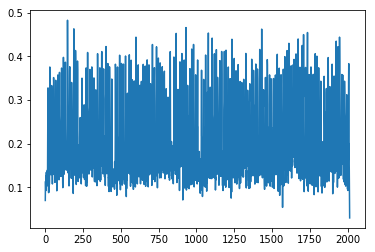

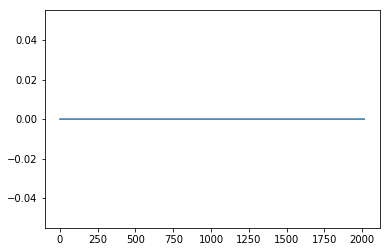

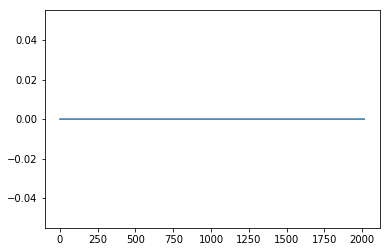

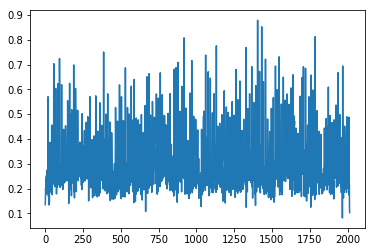

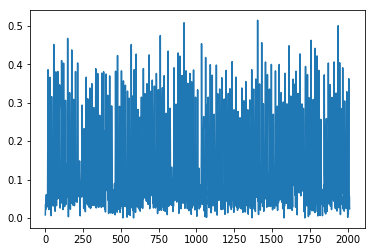

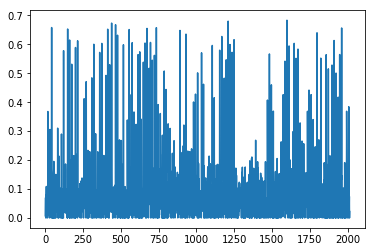

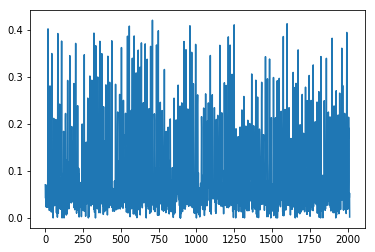

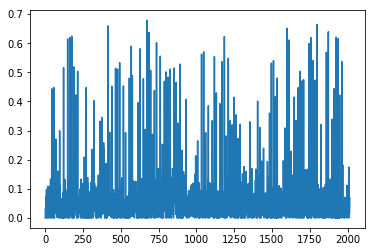

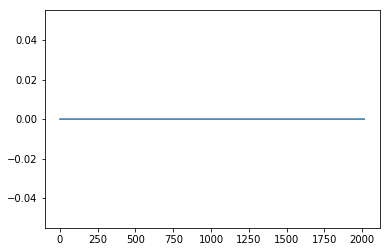

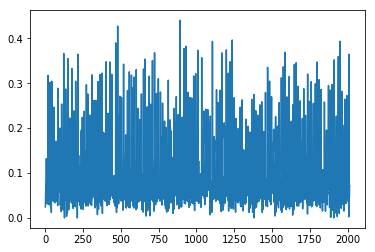

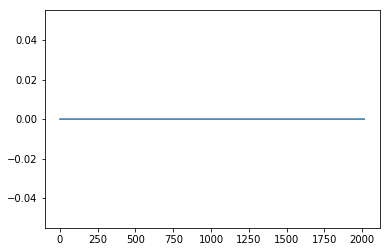

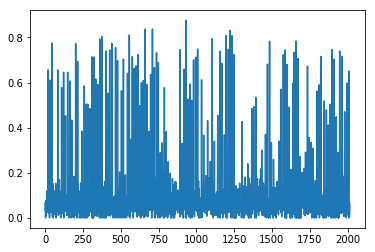

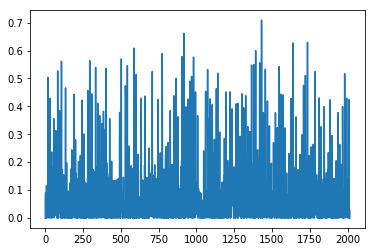

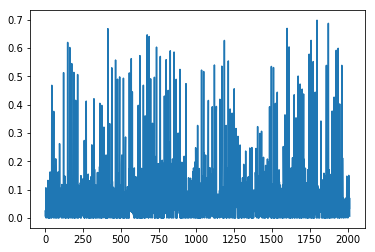

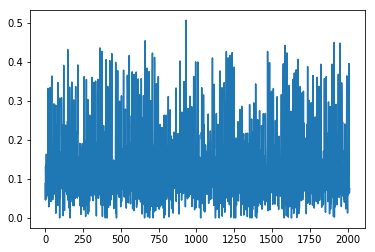

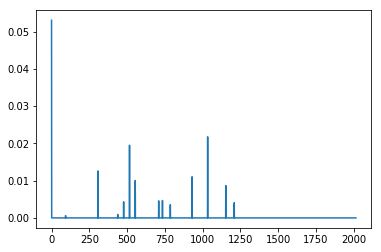

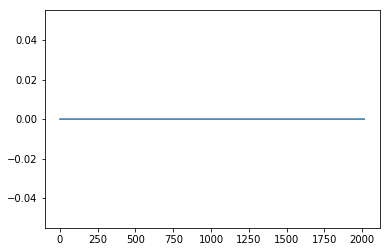

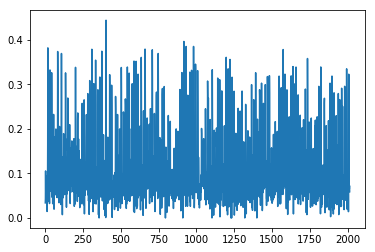

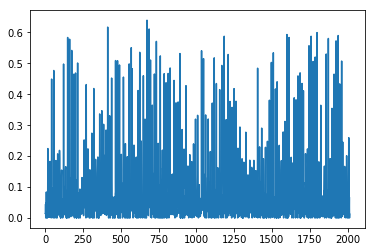

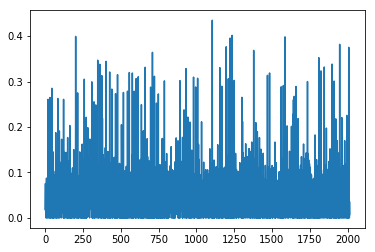

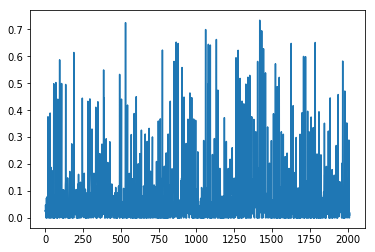

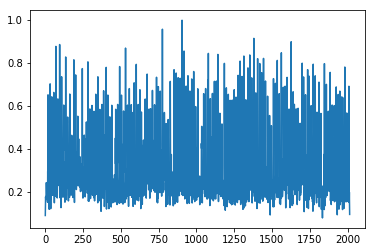

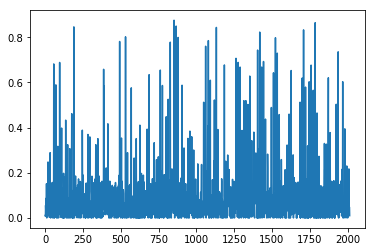

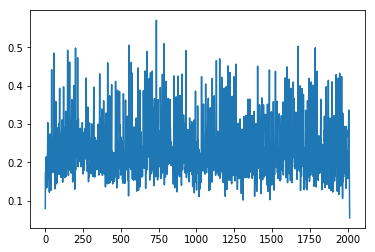

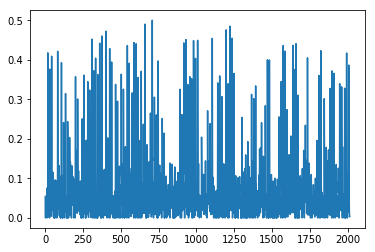

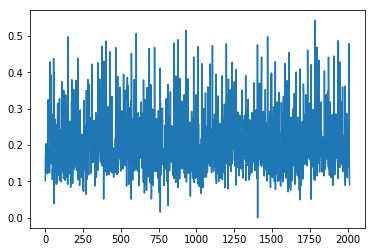

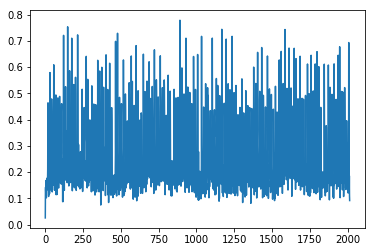

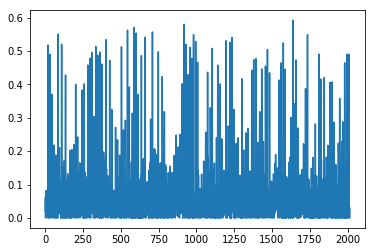

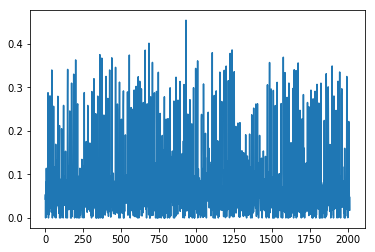

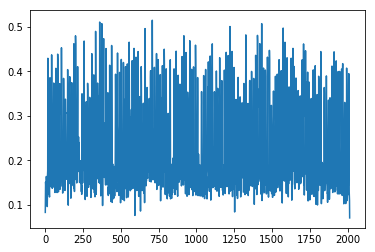

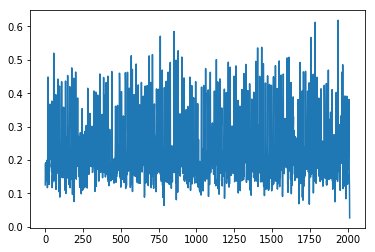

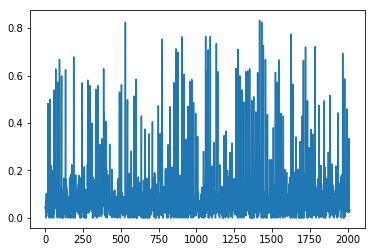

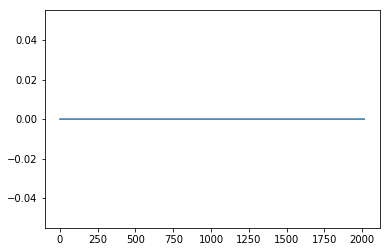

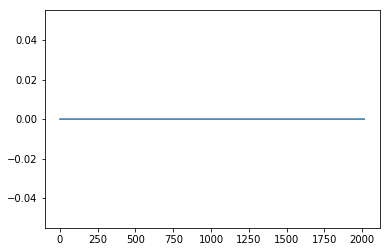

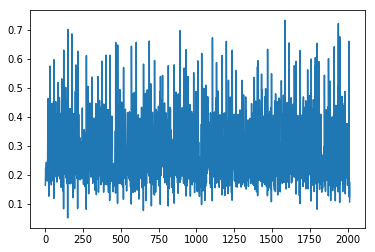

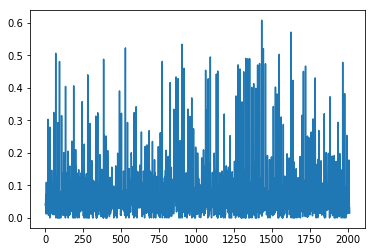

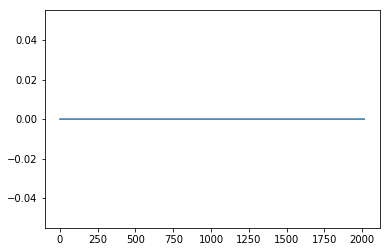

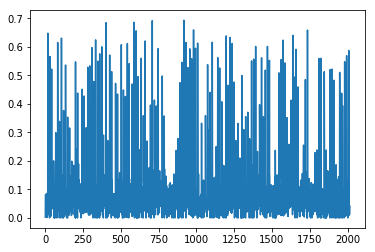

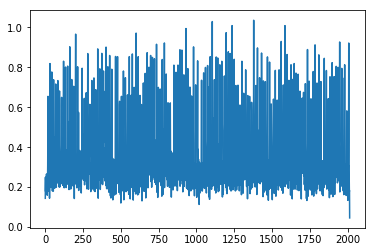

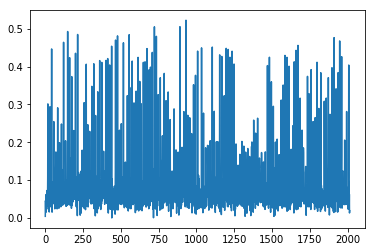

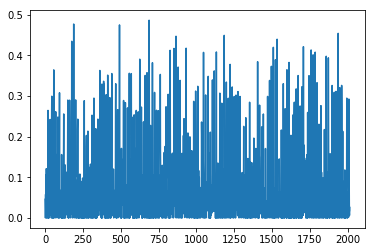

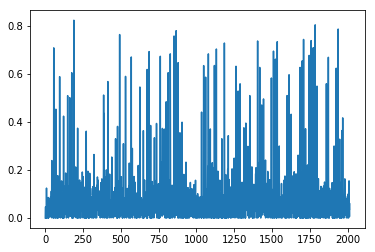

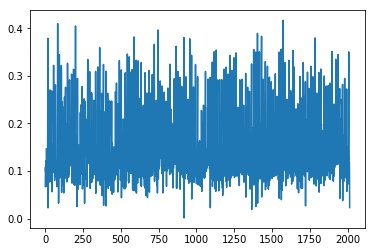

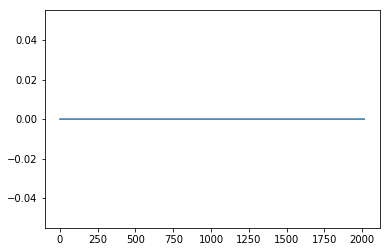

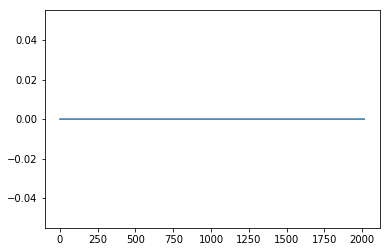

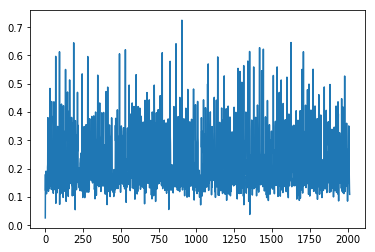

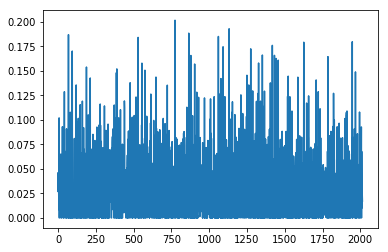

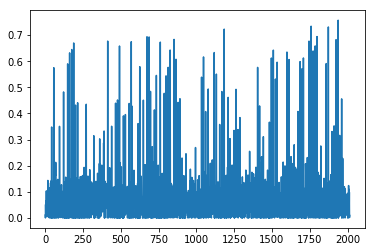

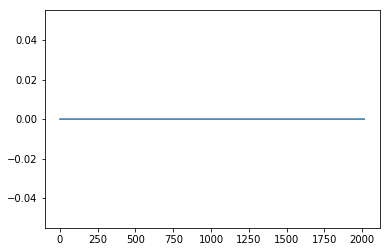

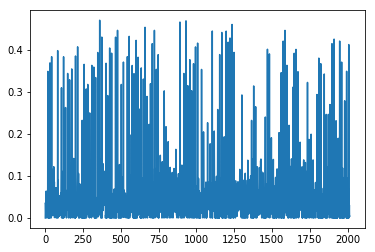

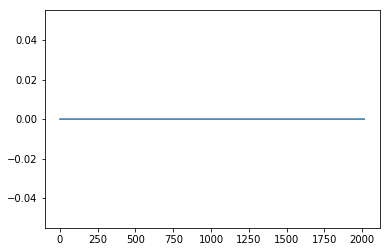

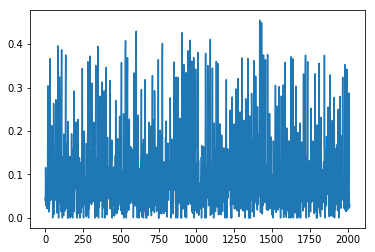

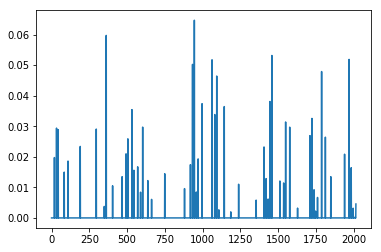

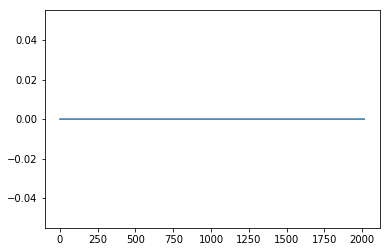

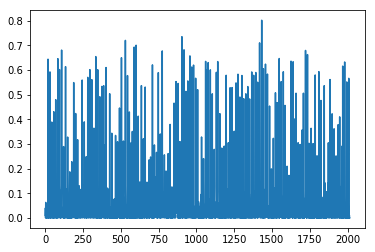

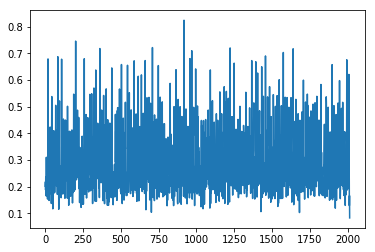

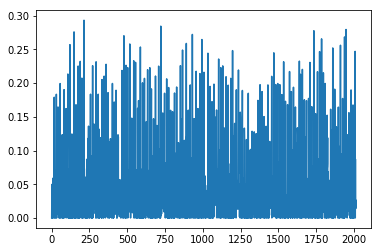

De 128 filtros, se utilizan 102 en promedio


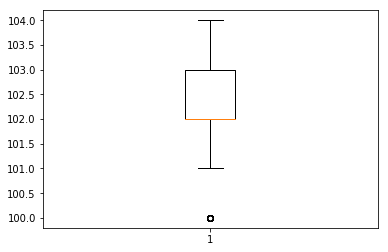

In [14]:
##light encoder?
lc_encoder = encoder_model.get_layer("LC_encoder")
lc_encoder.summary()

X_lc_encoder  = lc_encoder.predict(X_lc_scaled[:N], batch_size=512)

n_s = 0
plt.plot(X_lc_scaled[n_s])
plt.show()

for i in range(X_lc_encoder.shape[-1]):
    plt.plot(X_lc_encoder[n_s][:,i])
    plt.show()
    
usados = []
for n in range(N):
    aux = 0
    for i in range(X_lc_encoder.shape[-1]):
        if np.sum(X_lc_encoder[n][:,i]) > 0:
            aux +=1
    usados.append(aux)
print("De %d filtros, se utilizan %d en promedio"%(X_lc_encoder.shape[-1],np.mean(usados)))
plt.boxplot(usados)
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64482, 1)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 64482, 8)          48        
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 64482, 8)          328       
_________________________________________________________________
average_pooling1d_6 (Average (None, 32241, 8)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 32241, 16)         656       
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 32241, 16)         1296      
_________________________________________________________________
average_pooling1d_7 (Average (None, 16120, 16)         0         
__________

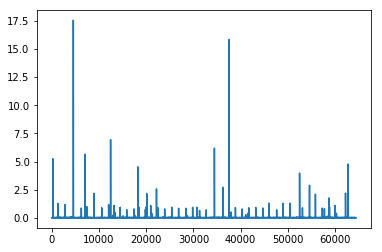

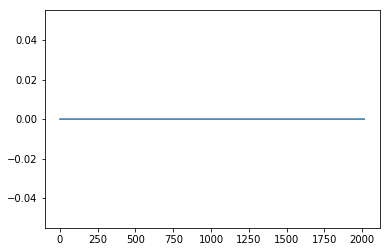

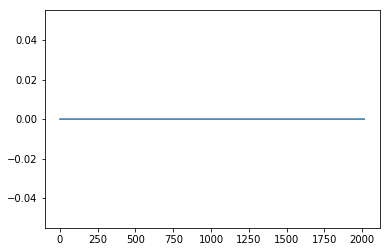

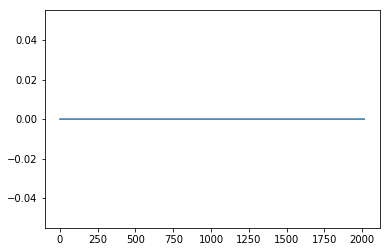

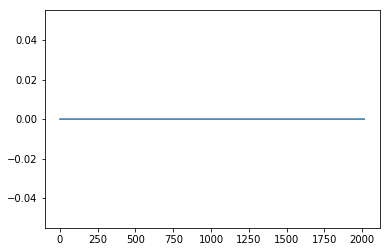

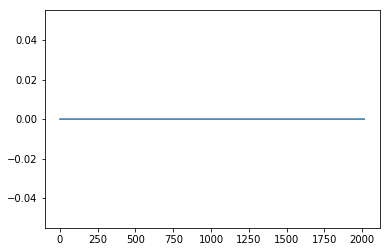

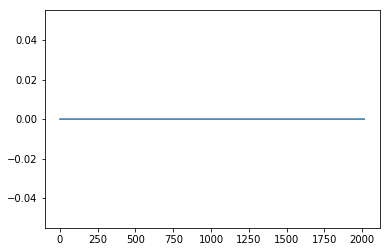

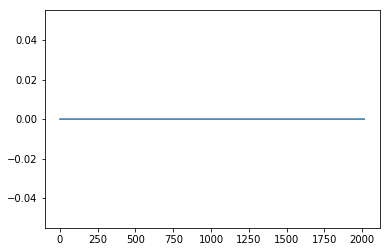

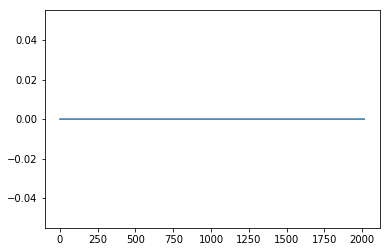

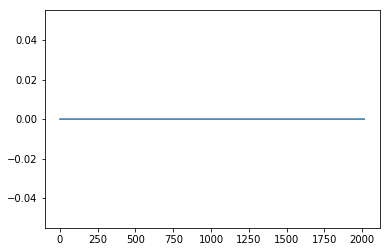

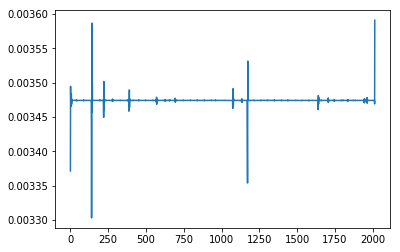

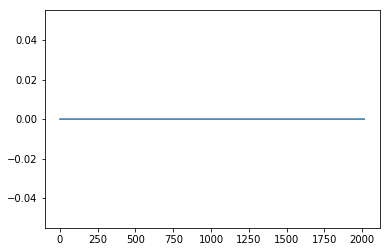

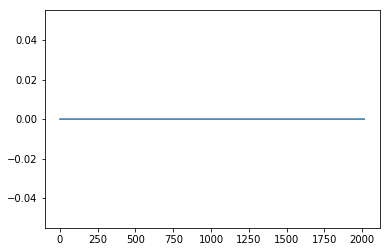

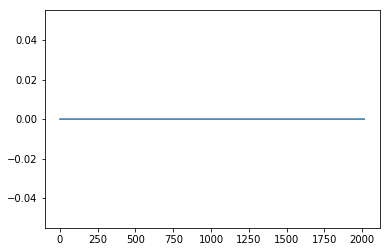

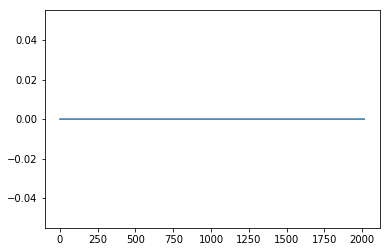

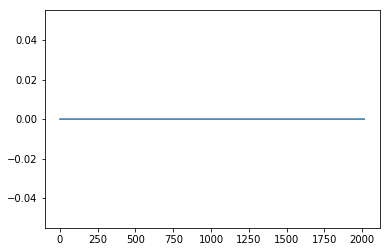

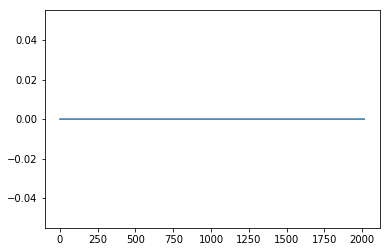

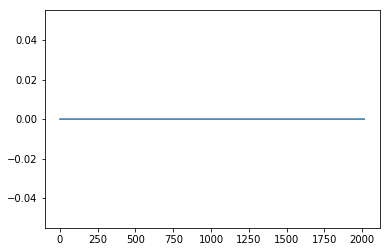

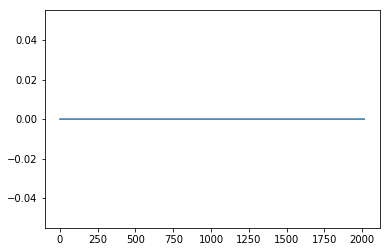

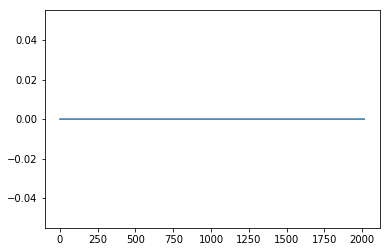

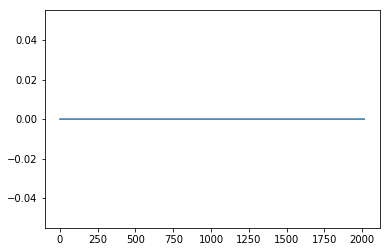

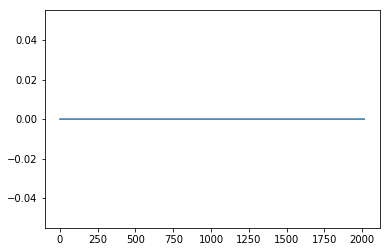

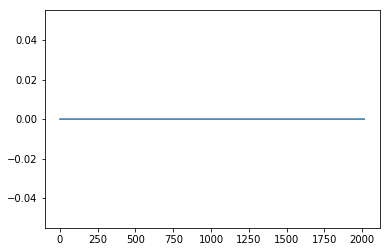

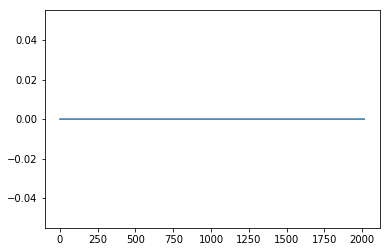

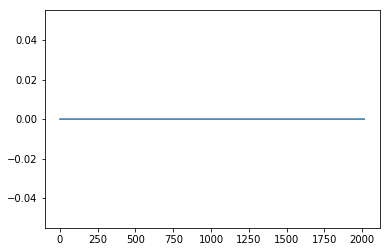

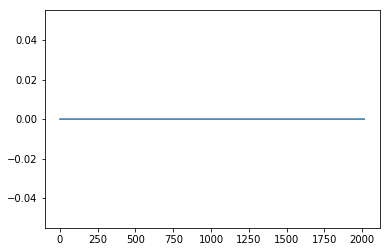

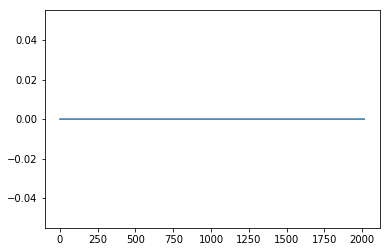

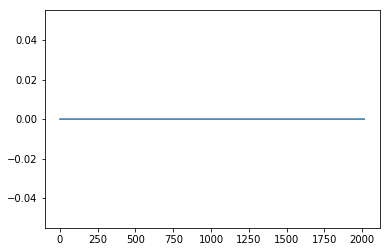

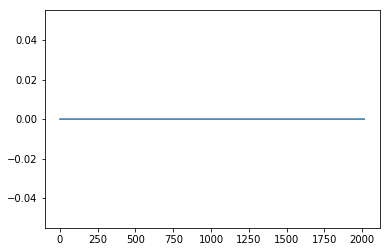

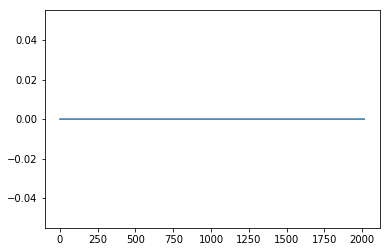

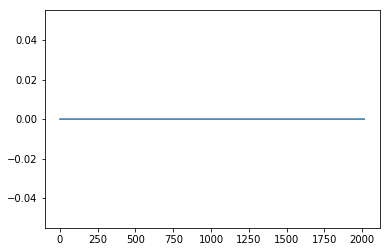

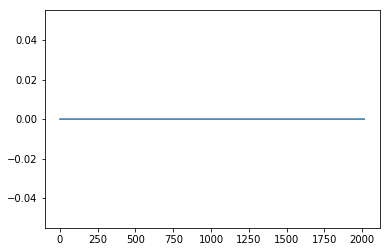

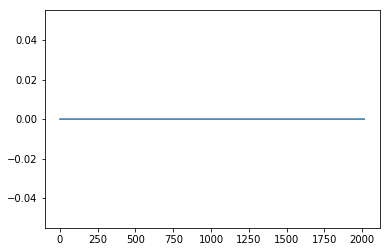

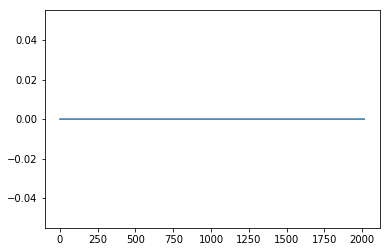

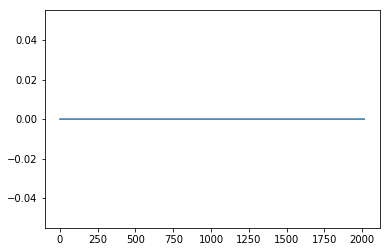

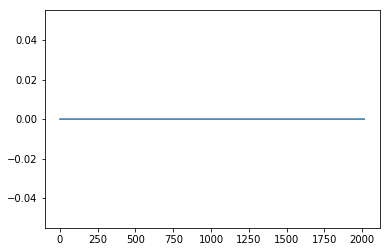

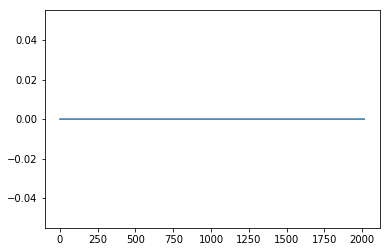

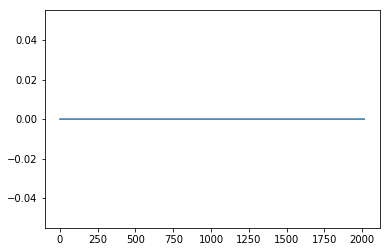

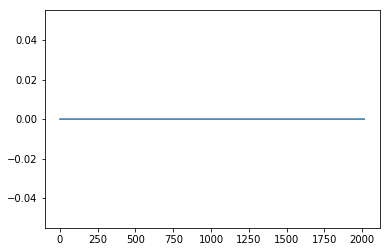

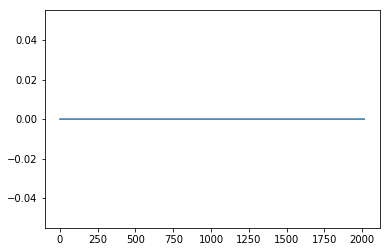

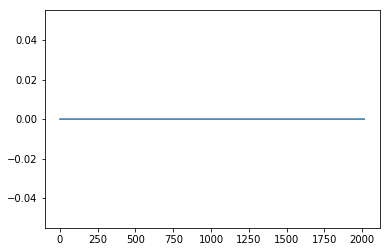

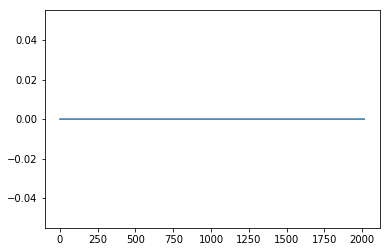

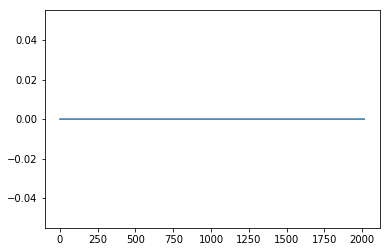

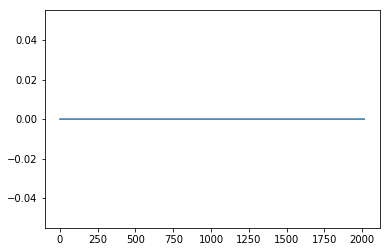

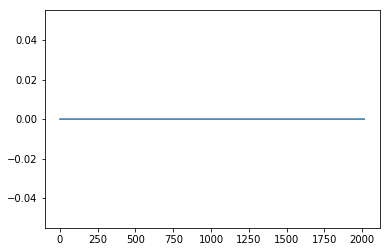

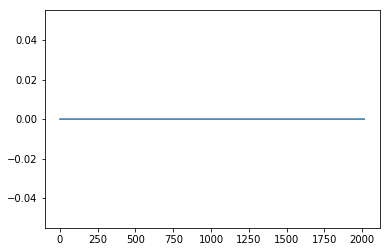

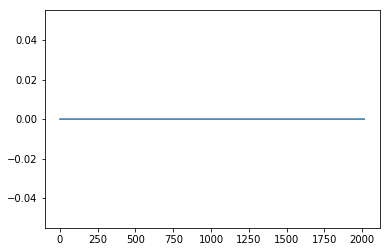

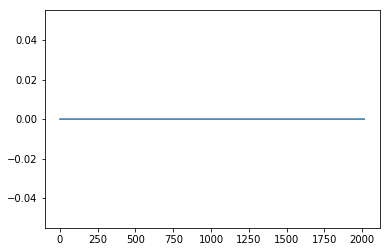

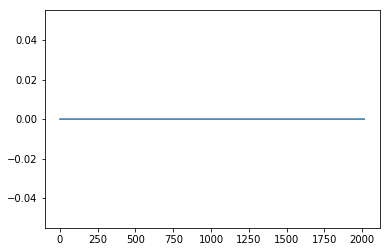

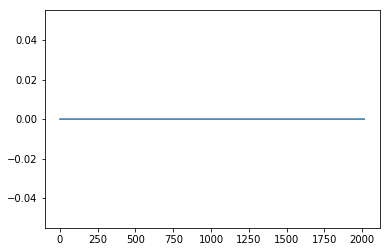

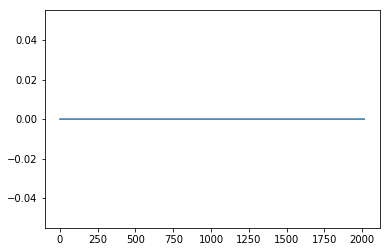

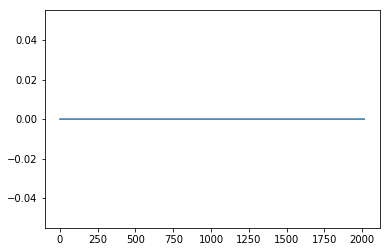

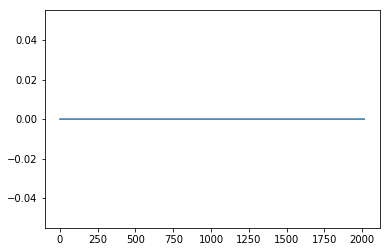

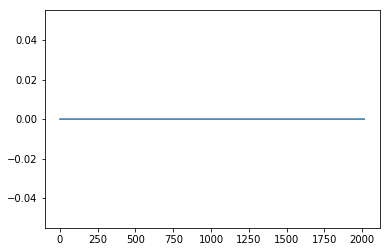

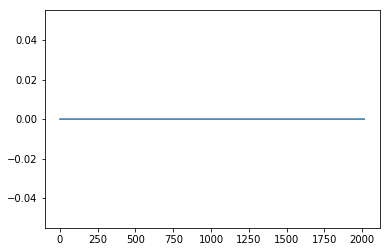

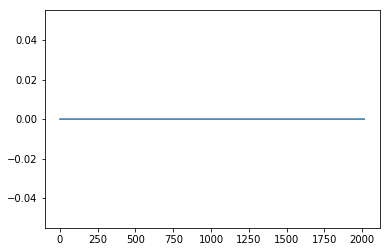

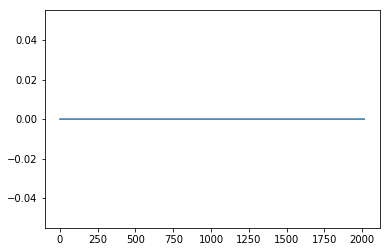

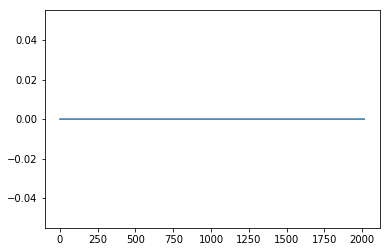

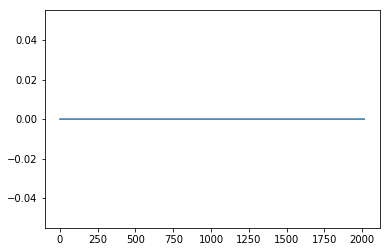

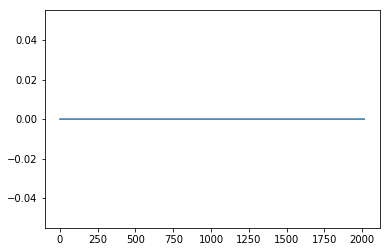

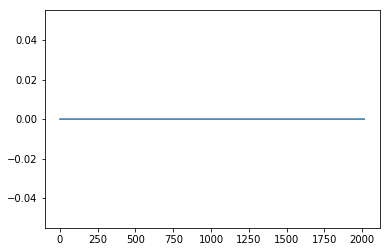

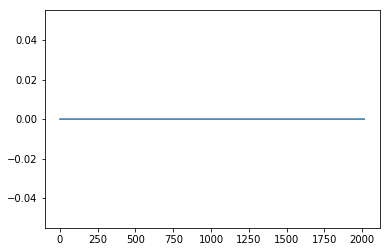

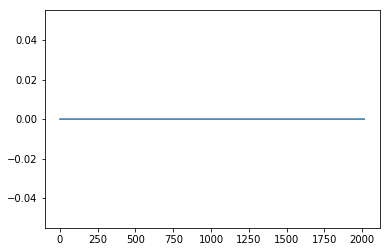

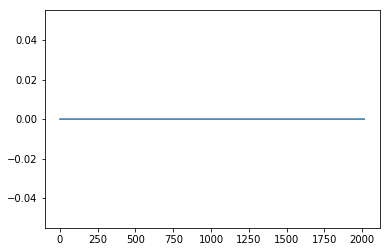

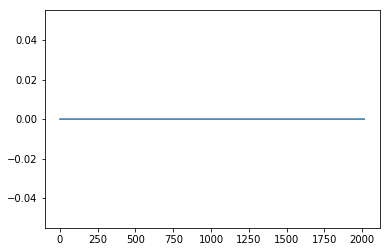

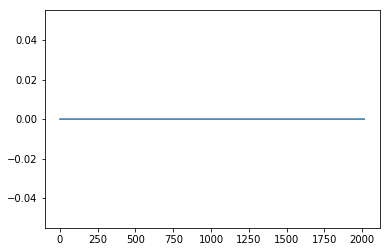

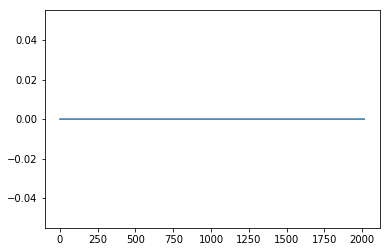

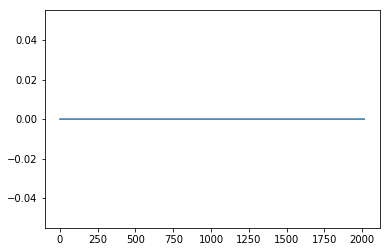

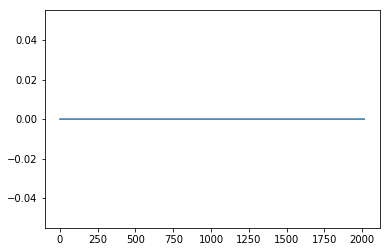

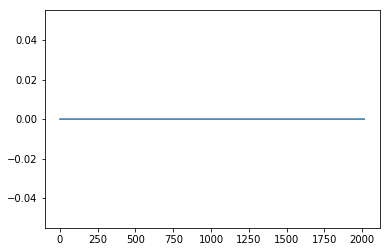

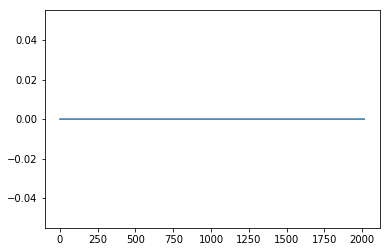

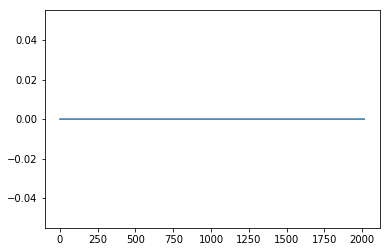

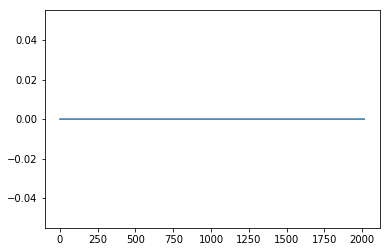

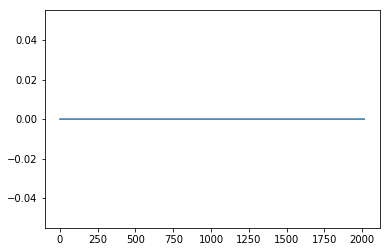

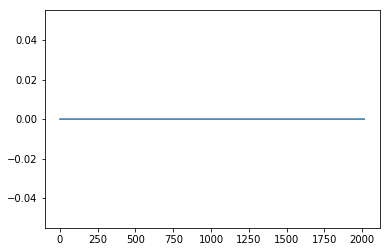

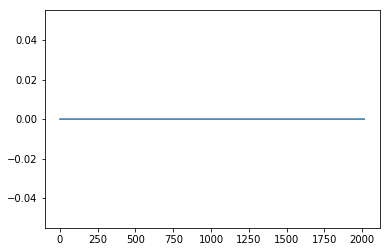

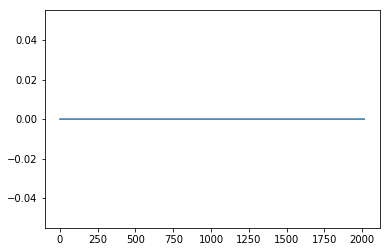

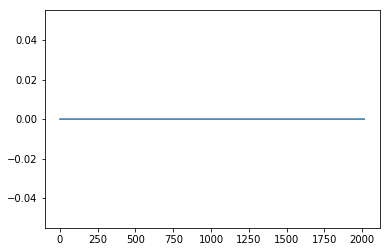

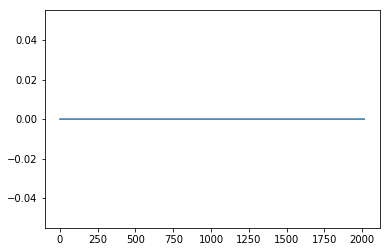

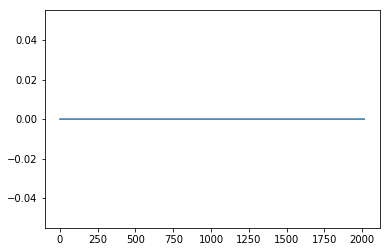

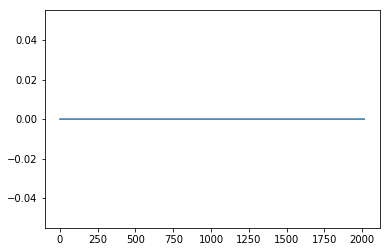

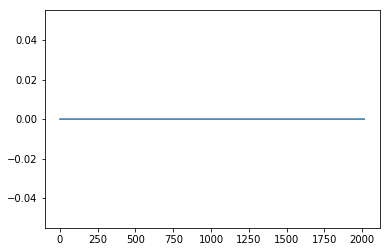

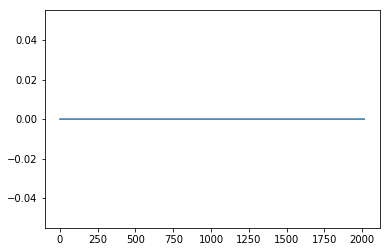

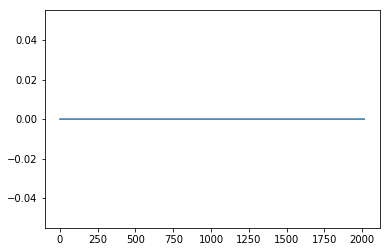

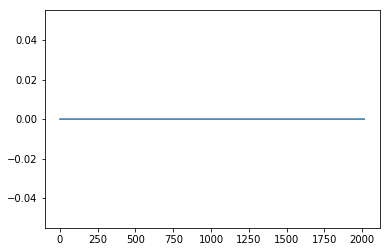

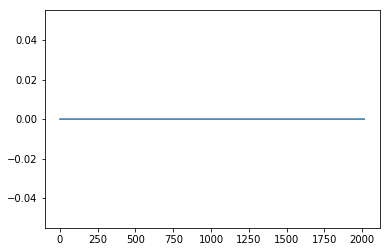

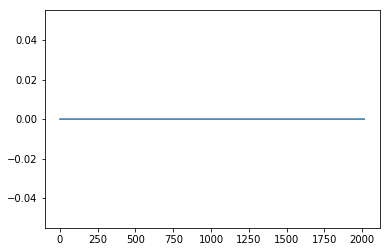

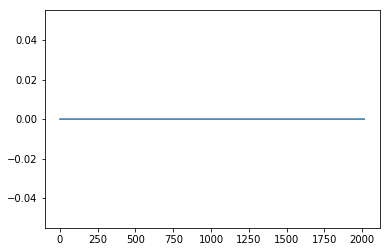

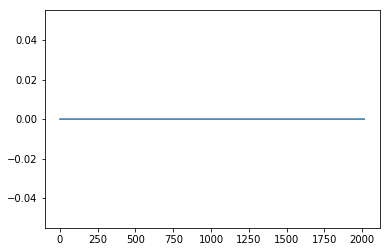

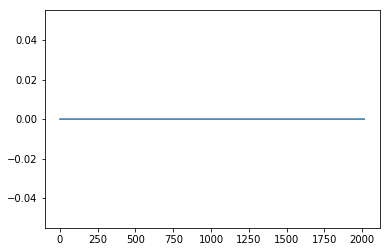

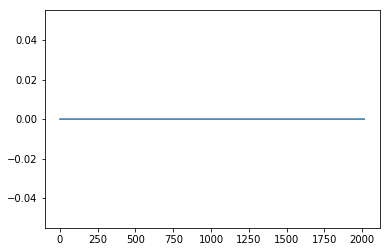

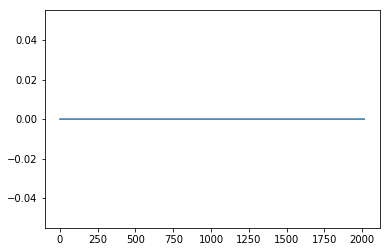

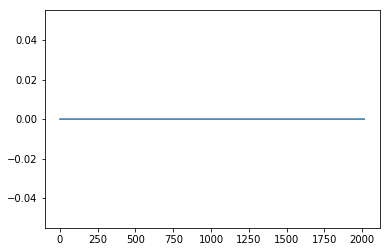

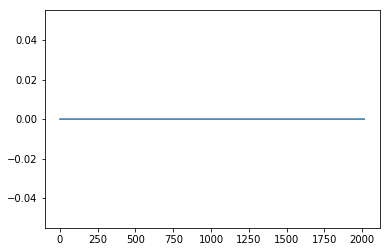

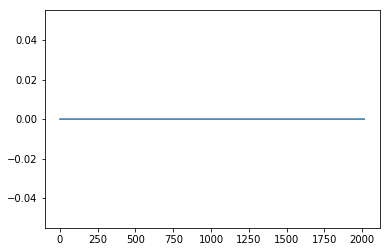

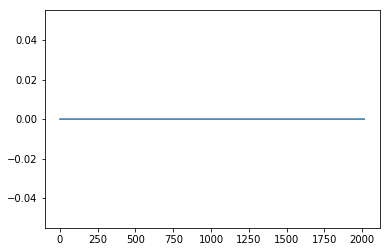

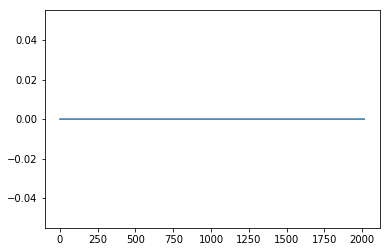

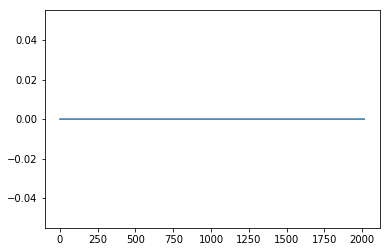

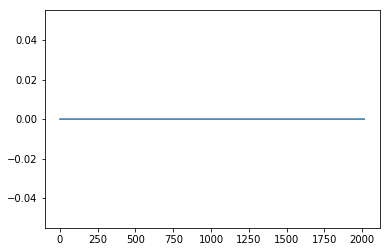

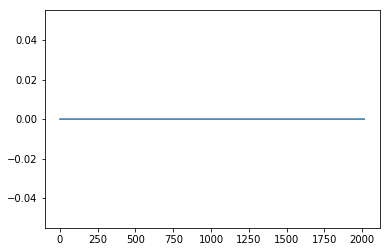

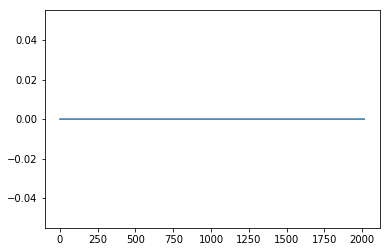

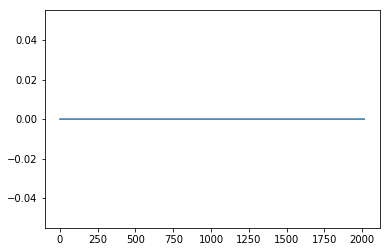

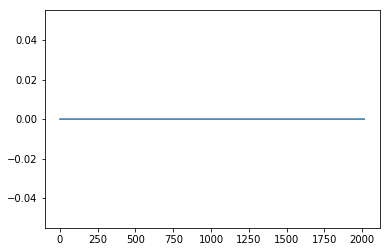

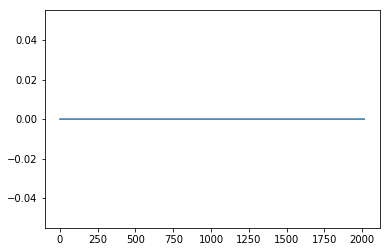

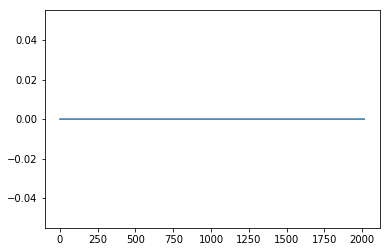

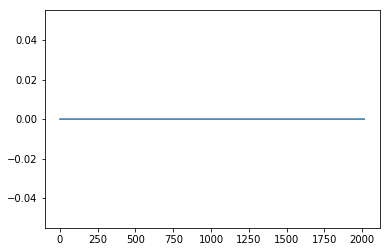

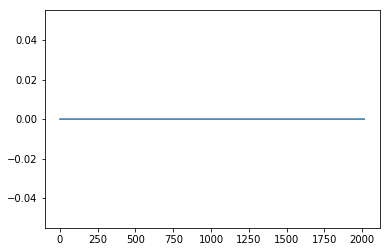

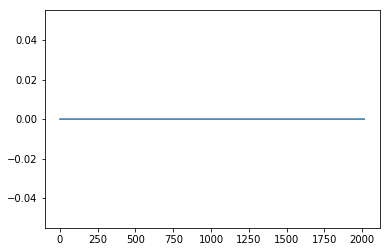

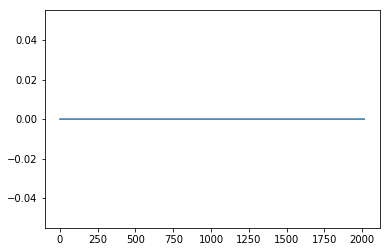

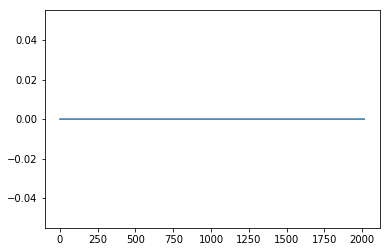

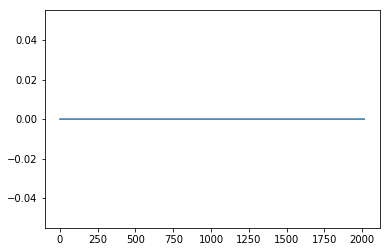

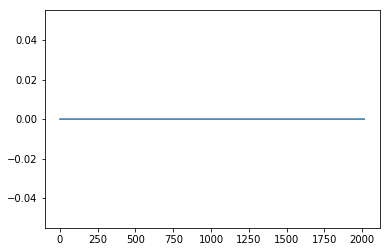

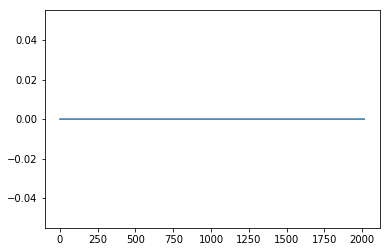

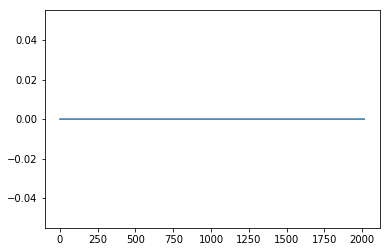

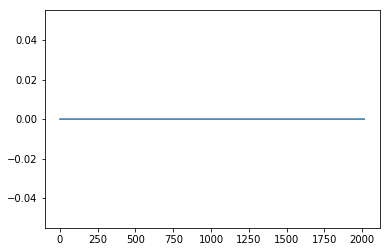

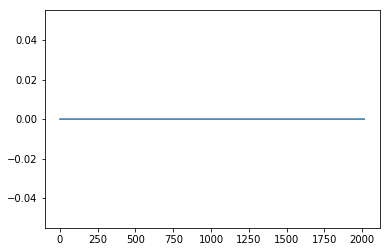

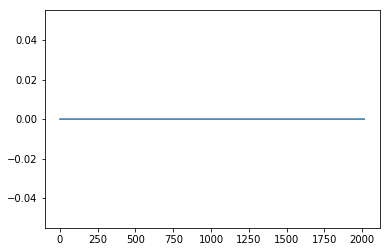

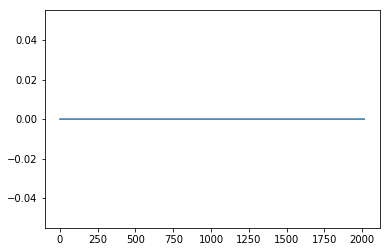

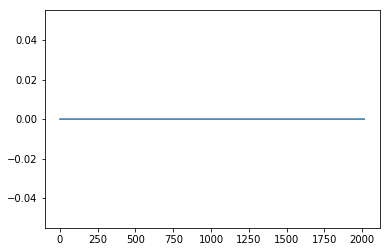

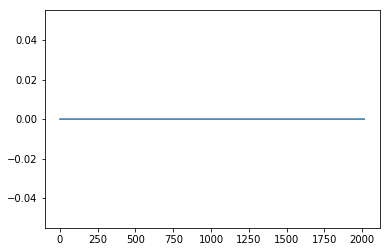

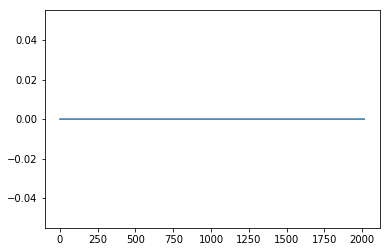

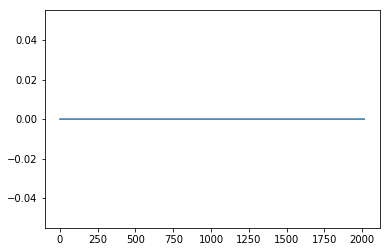

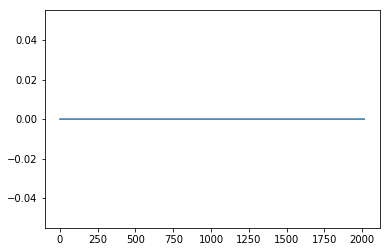

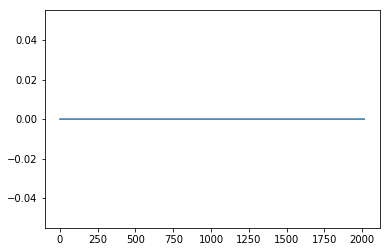

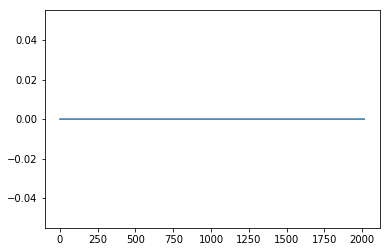

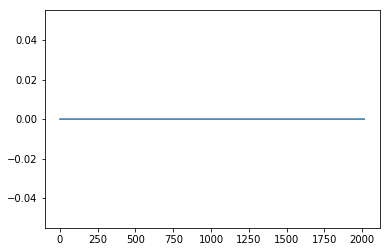

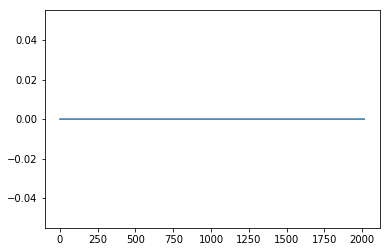

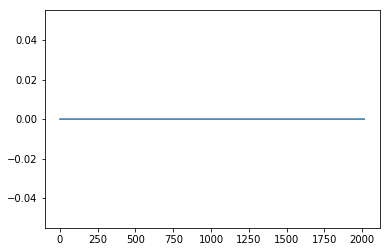

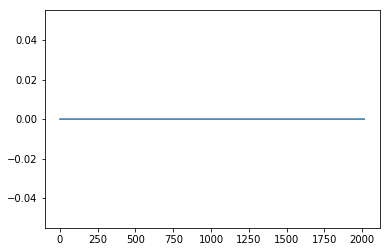

De 128 filtros, se utilizan 5 en promedio


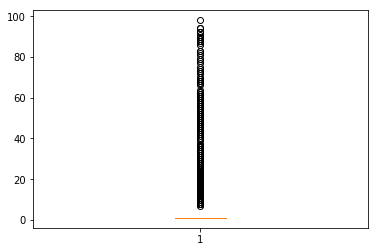

In [13]:
#time encoded..
time_encoder = encoder_model.get_layer("Time_encoder")
time_encoder.summary()

X_time_encoder  = time_encoder.predict(X_time[:N], batch_size=512)

n_s = 0
plt.plot(X_time[n_s])
plt.show()

for i in range(X_time_encoder.shape[-1]):
    plt.plot(X_time_encoder[n_s][:,i])
    plt.show()
    
usados = []
for n in range(N):
    aux = 0
    for i in range(X_time_encoder.shape[-1]):
        if np.sum(X_time_encoder[n][:,i]) > 0:
            aux +=1
    usados.append(aux)
print("De %d filtros, se utilizan %d en promedio"%(X_time_encoder.shape[-1],np.mean(usados)))
plt.boxplot(usados)
plt.show() ### reducir los filtros de tiempo..

### utilizando el decoder para imputar datos en tiempos faltantes..

In [46]:
decoder_model = keras.models.load_model("./trained_models/De_op4_doubleE_GRU1.h5")
decoder_model.summary()

p_l = 10
X_enc  = encoder_model.predict([X_lc_scaled[:p_l],X_time[:p_l]], batch_size=512)

/users/fmena/anaconda3/envs/tesis/lib/python3.5/site-packages/keras/models.py:282: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 64482, 1)     0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           (None, 2015, 128)    0                                            
__________________________________________________________________________________________________
model_8 (Model)                 (None, 2015, 128)    164056      input_10[0][0]                   
__________________________________________________________________________________________________
concatenate_4 (Concatenate)     (None, 2015, 256)    0           input_11[0][0]                   
                                                                 model_8[1][0]                    
__________

In [52]:
#time_cont = np.arange(0,3000,0.0205)
time_cont = np.tile(0.0205, (max_len))
time_cont = np.tile(time_cont, (p_l,1))[:,:,None]
print("Time shape before: ",time_cont.shape)
time_cont = keras.preprocessing.sequence.pad_sequences(time_cont,maxlen=max_len,value=0,dtype='float32'
                                                       ,padding='post', truncating='post')
print("Time shape after: ",time_cont.shape)

X_reconstr = decoder_model.predict([X_enc, time_cont])

Time shape before:  (10, 64482, 1)
Time shape after:  (10, 64482, 1)


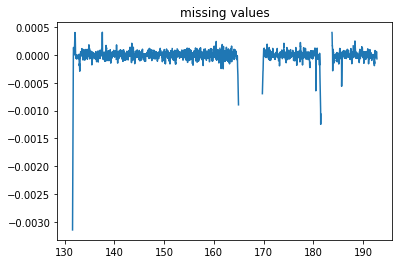

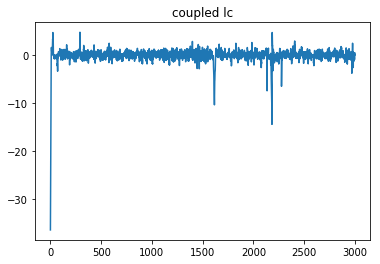

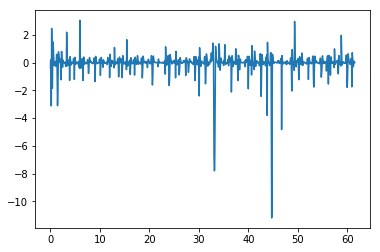

In [56]:
n = 2
plt.plot(time_kepler[n][:3000], process_lc[n][:3000])
plt.title("missing values")
plt.show()

plt.plot(X_lc_scaled[n][:3000])
plt.title("coupled lc")
plt.show()

plt.plot(np.cumsum(time_cont[n][:3000]), X_reconstr[n][:3000])
plt.show()

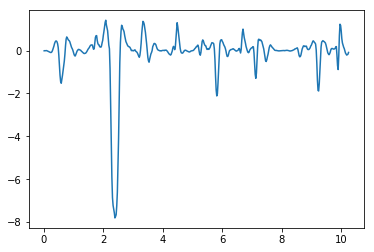

In [57]:
plt.plot(np.cumsum(time_cont[n][1500:2000]), X_reconstr[n][1500:2000])
plt.show()

In [17]:
#encode light curves...
X_lc_scaled_real = X_lc_scaled[:N] 
X_lc_scaled_aug  = X_lc_scaled[N:] 
X_time_real = X_time[:N] 
X_time_aug  = X_time[N:] 

#tiempo por delante
X_enc_lc_real  = encoder_model.predict([X_time_real, X_lc_scaled_real], batch_size=512)
X_enc_lc_aug  = encoder_model.predict([X_time_aug, X_lc_scaled_aug], batch_size=512)
X_enc_lc_real.shape

(8054, 2015, 128)

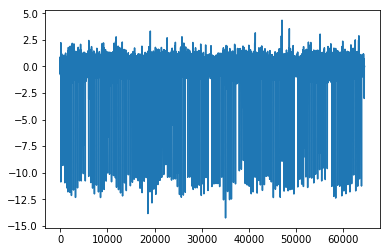

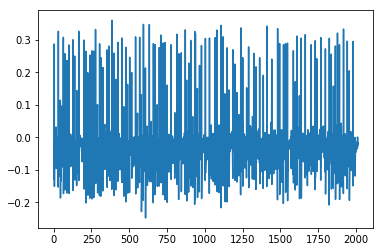

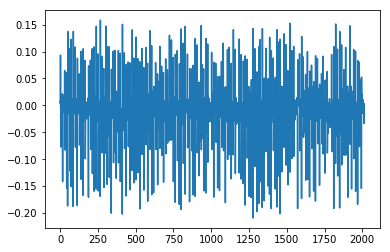

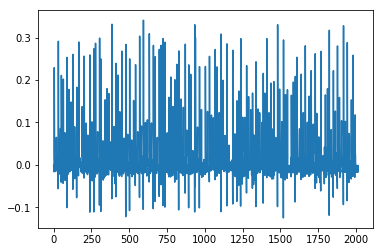

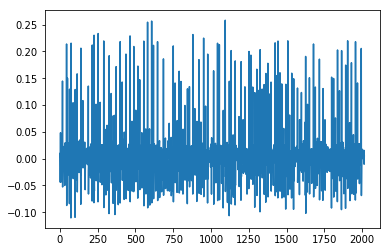

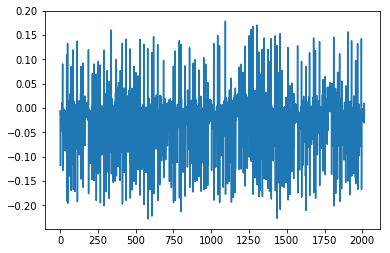

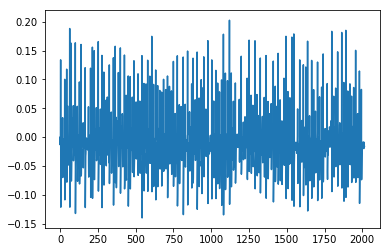

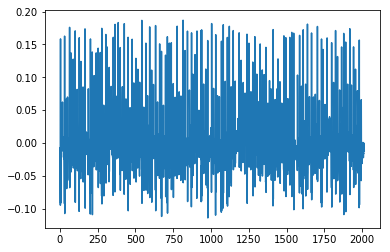

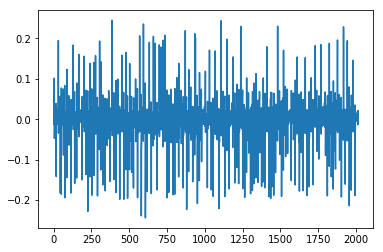

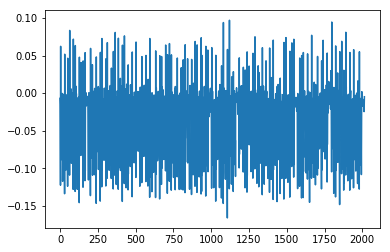

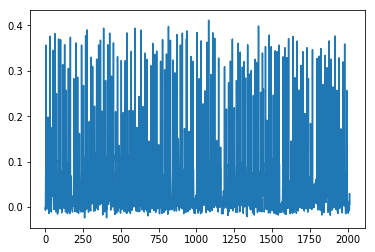

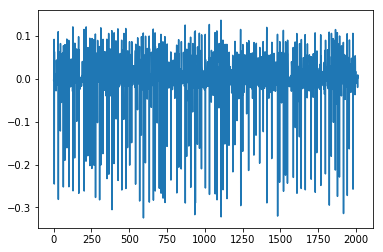

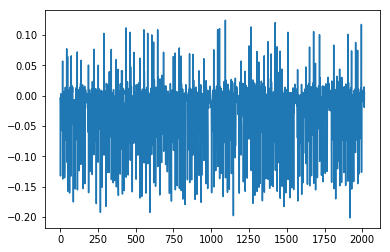

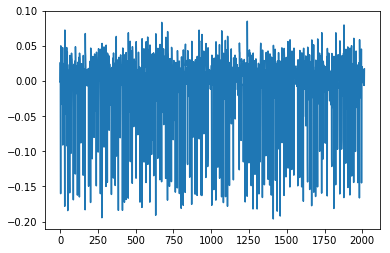

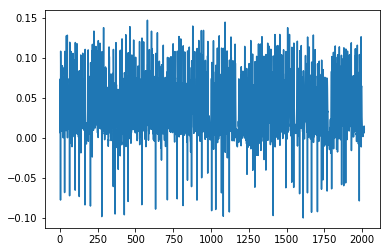

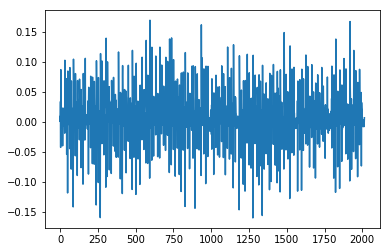

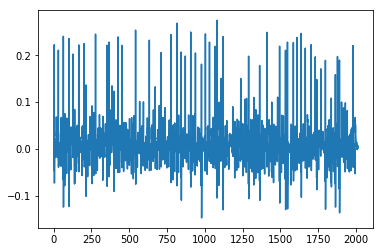

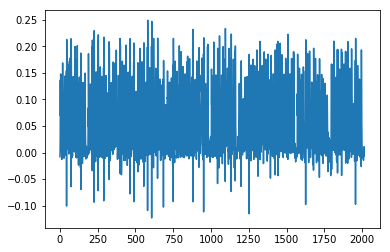

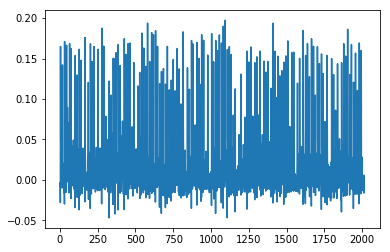

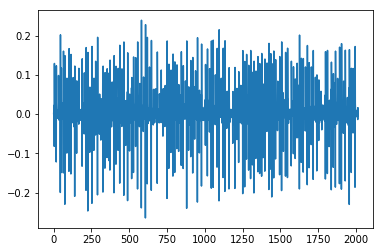

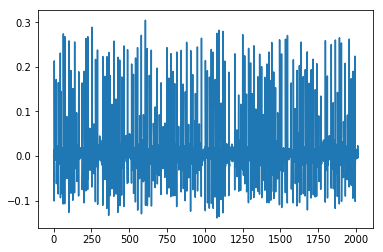

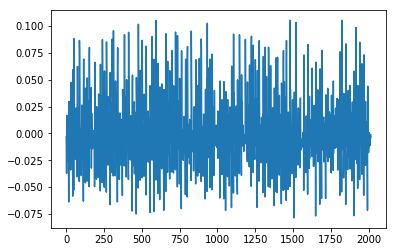

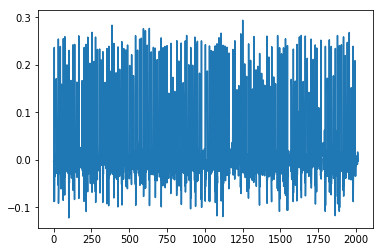

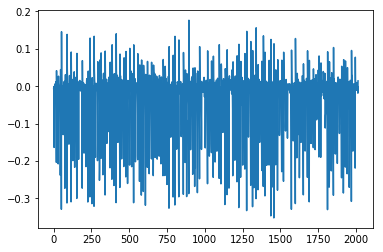

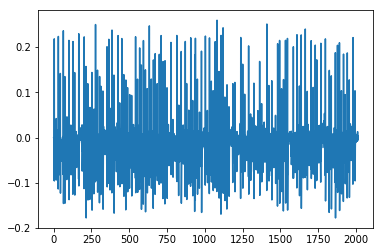

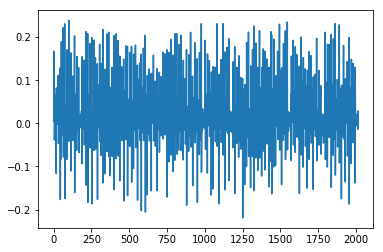

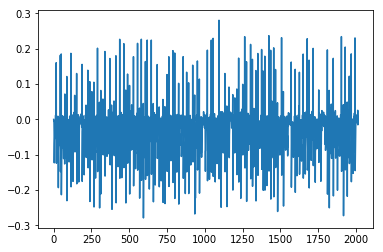

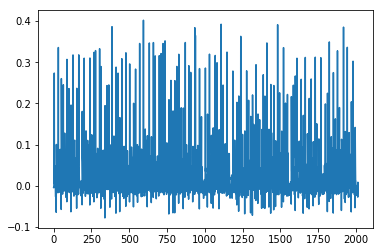

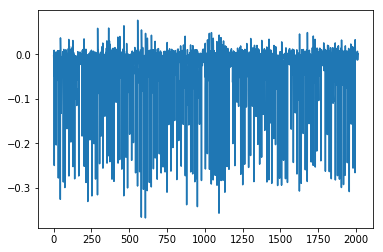

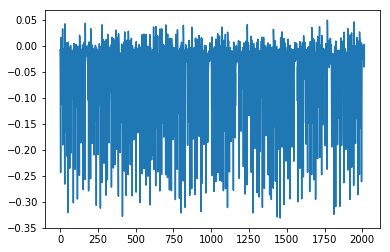

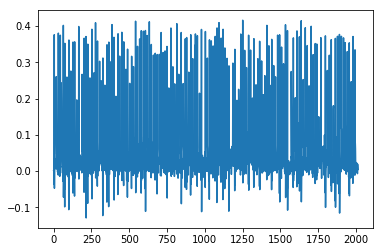

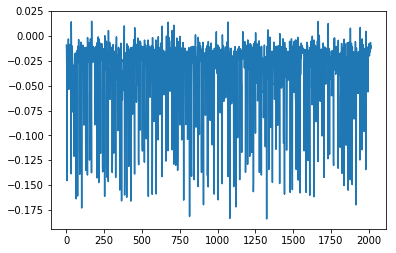

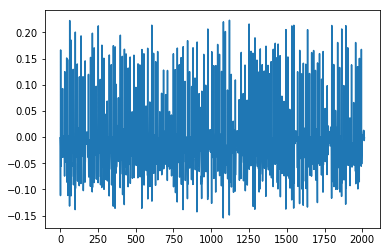

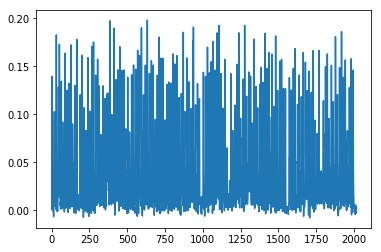

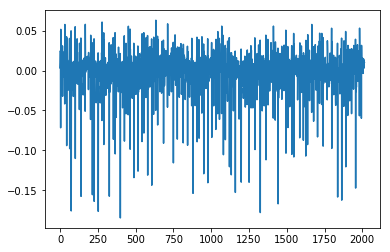

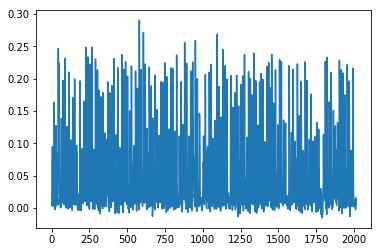

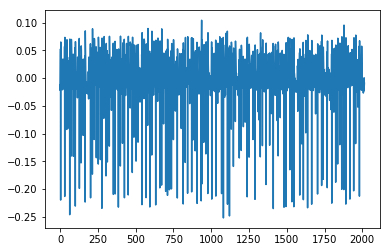

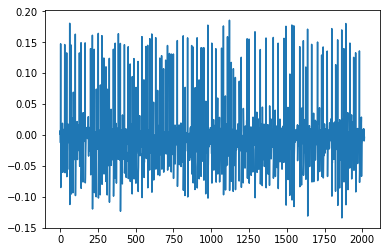

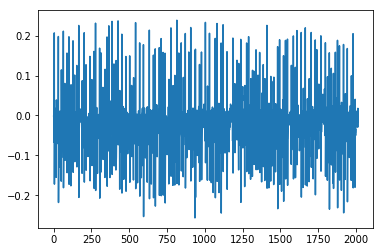

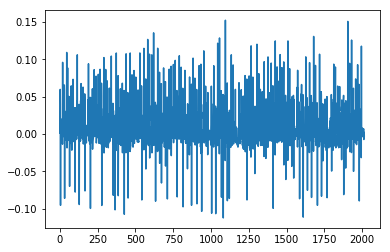

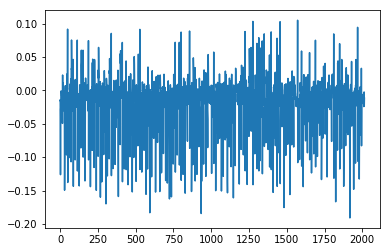

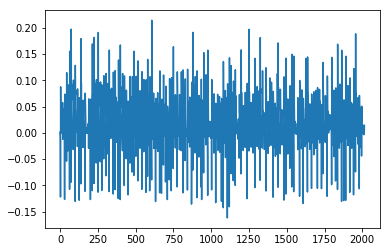

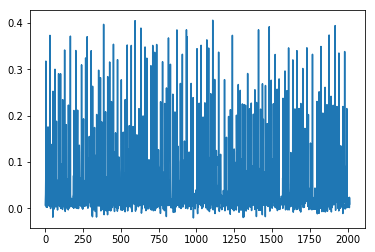

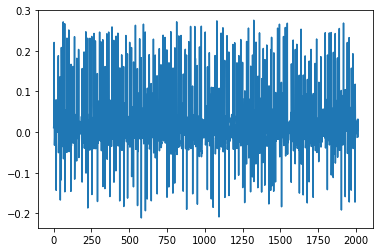

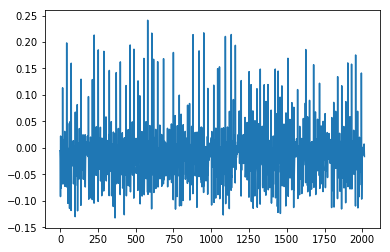

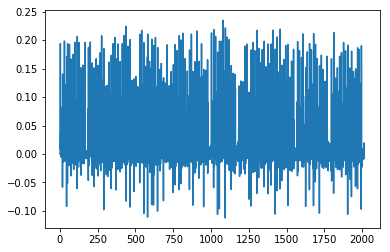

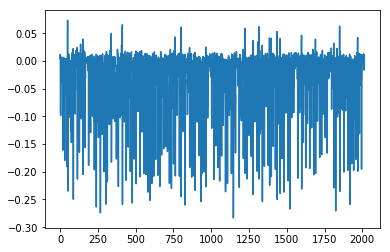

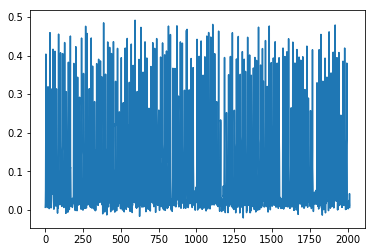

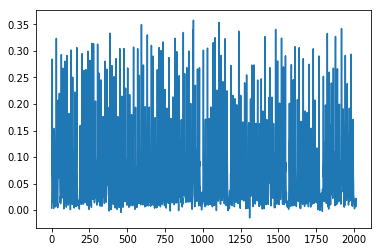

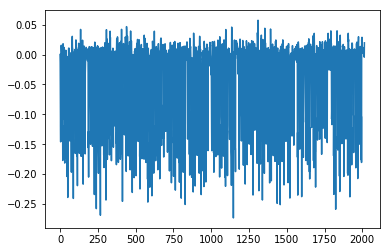

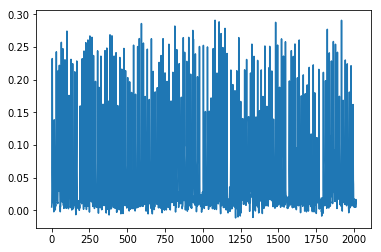

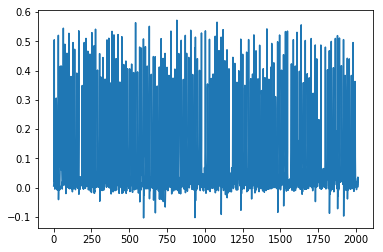

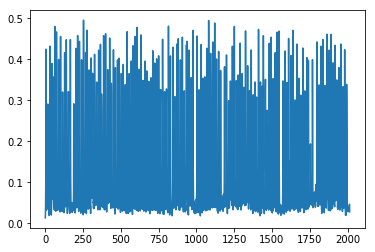

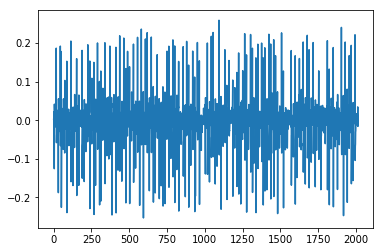

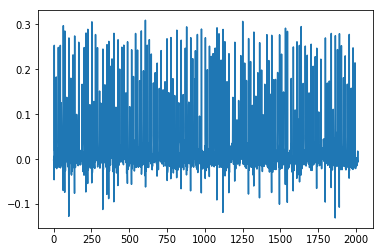

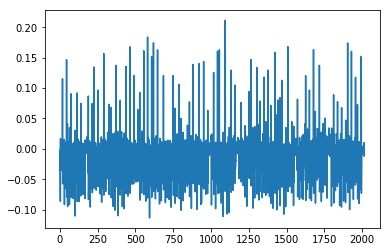

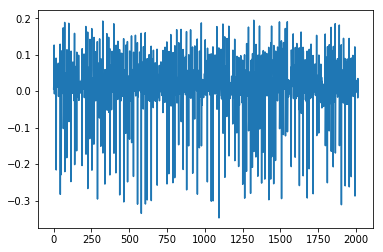

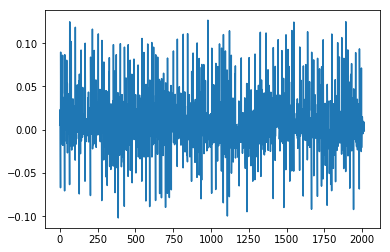

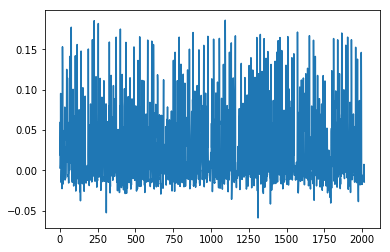

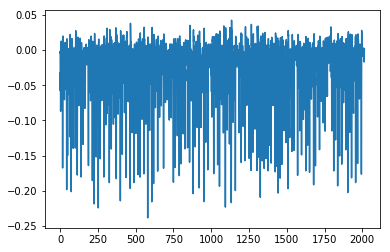

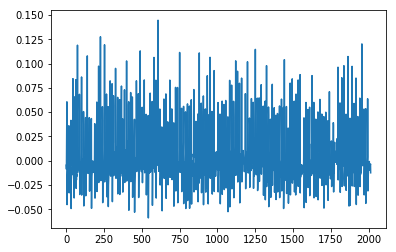

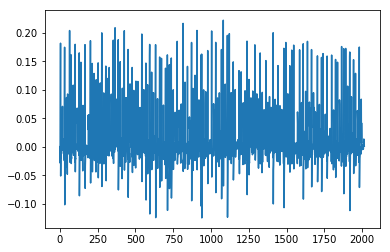

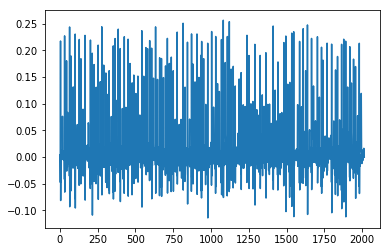

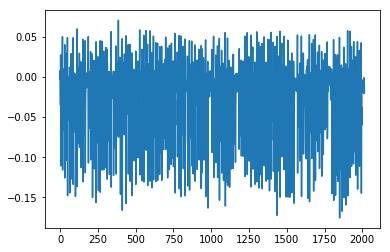

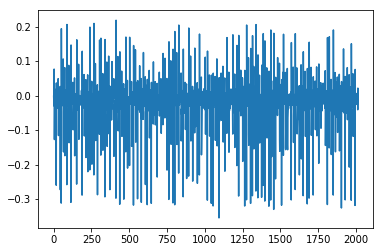

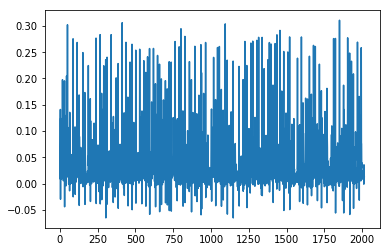

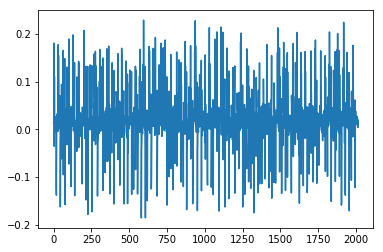

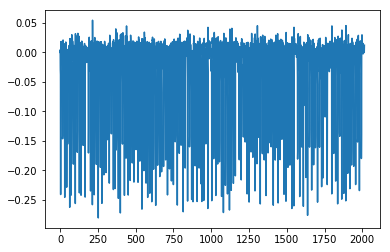

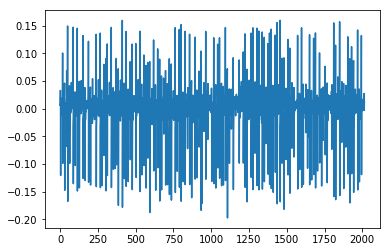

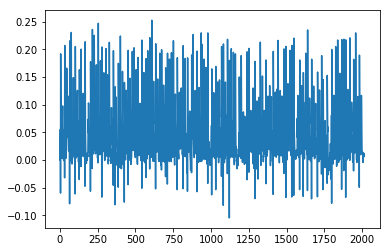

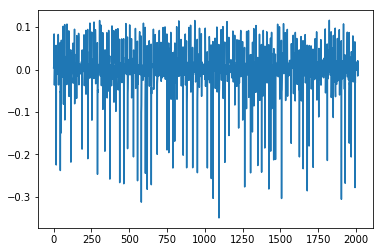

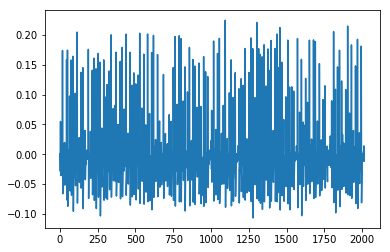

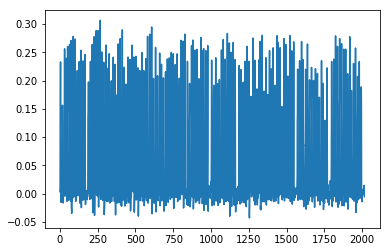

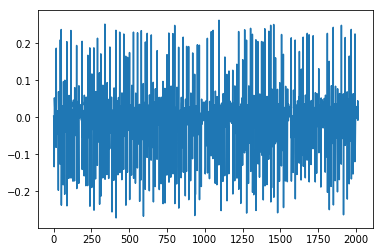

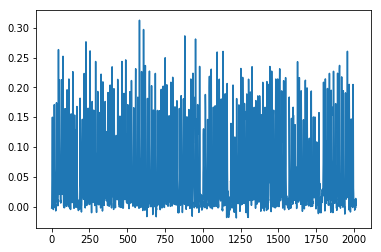

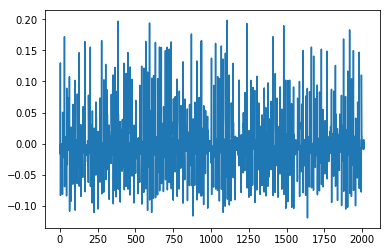

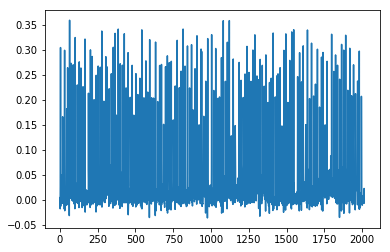

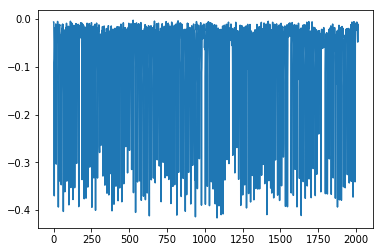

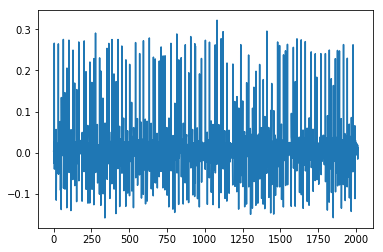

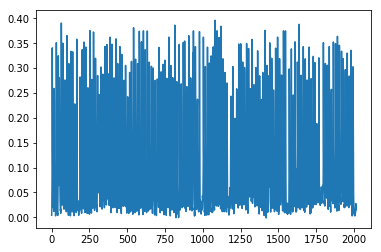

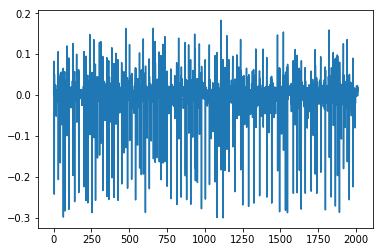

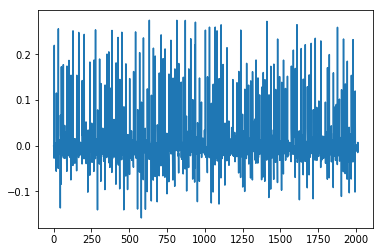

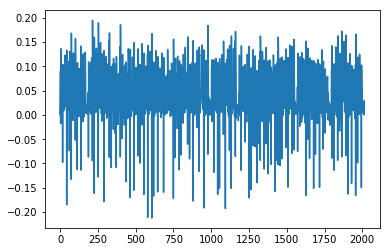

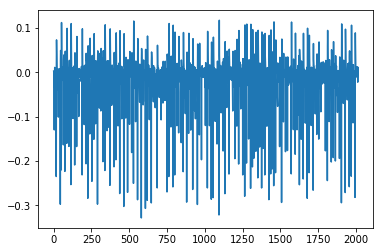

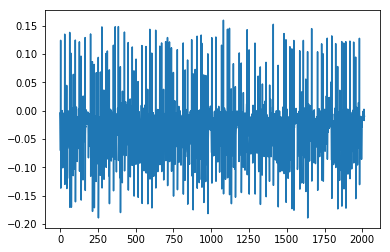

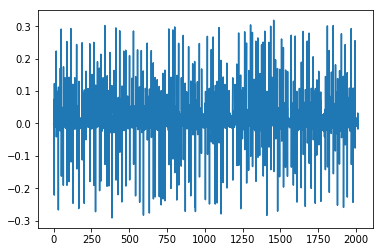

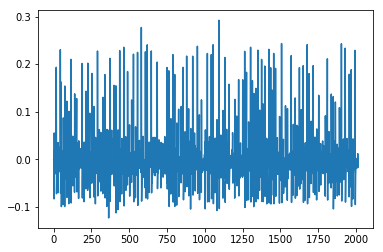

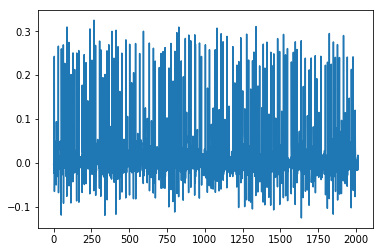

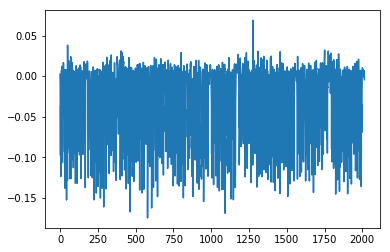

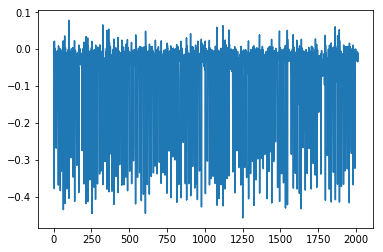

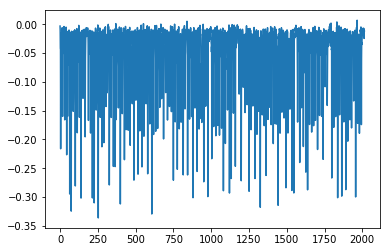

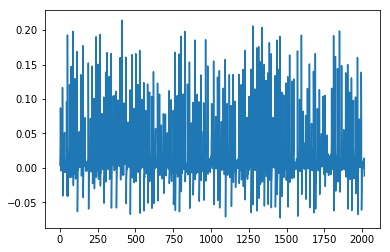

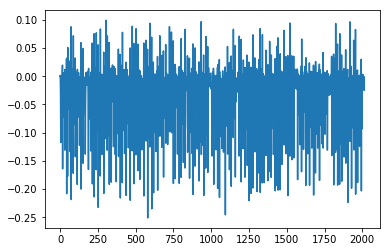

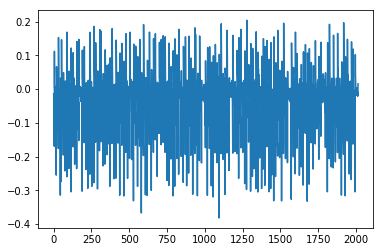

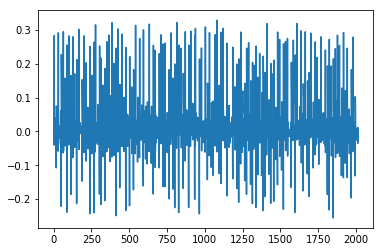

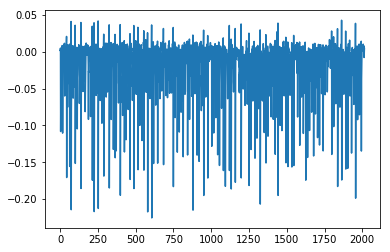

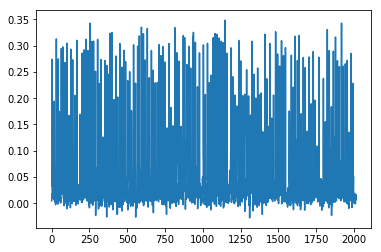

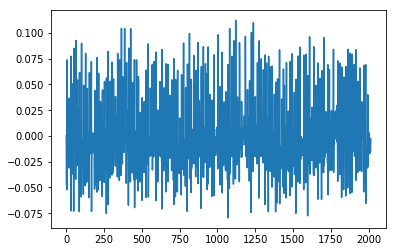

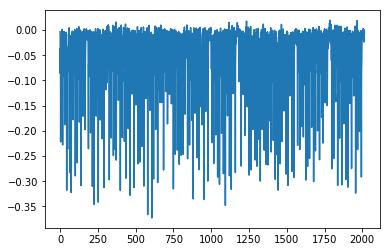

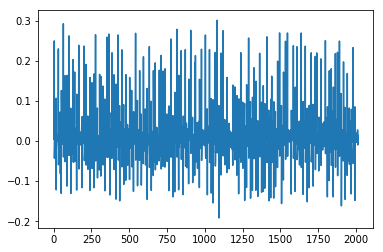

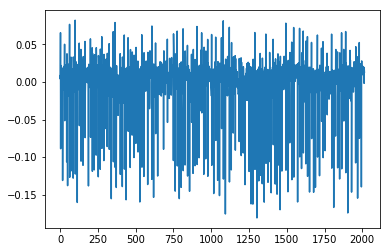

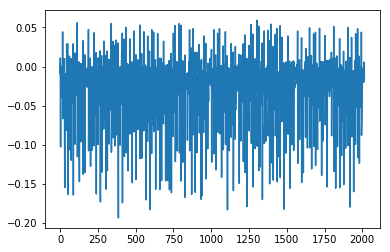

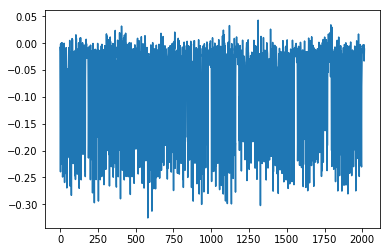

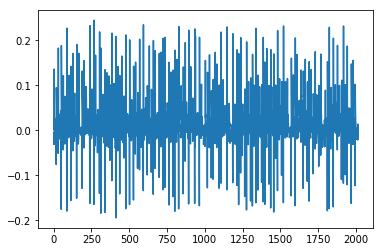

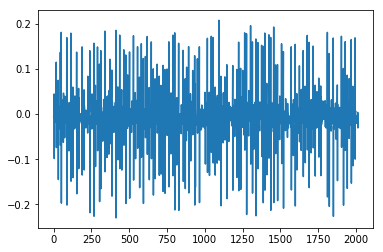

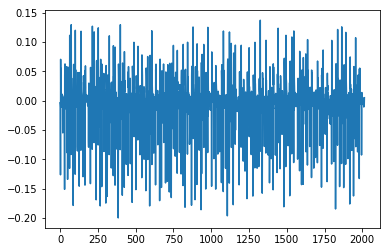

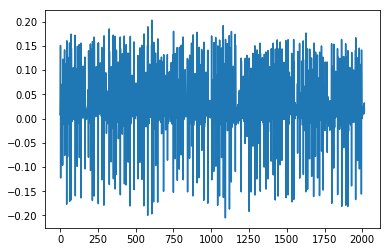

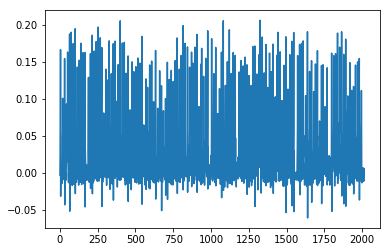

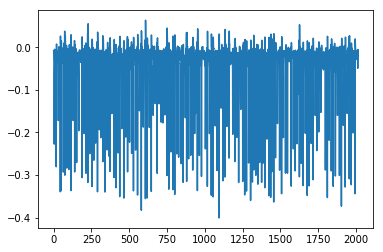

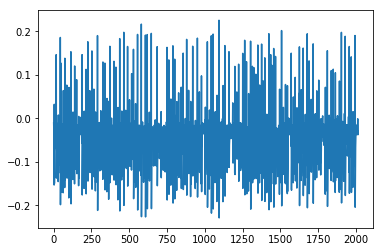

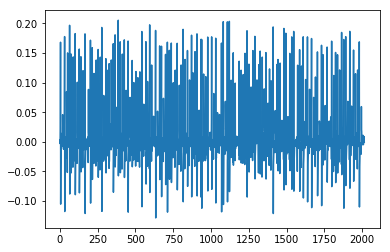

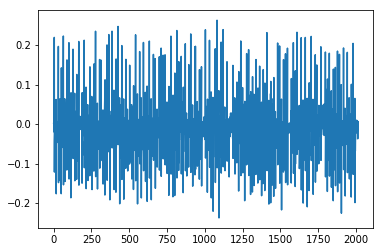

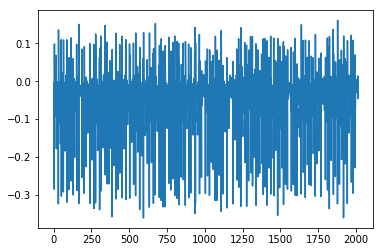

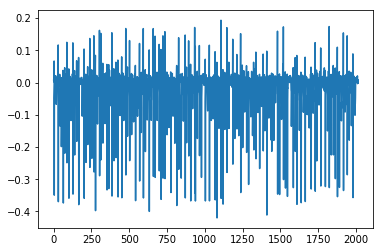

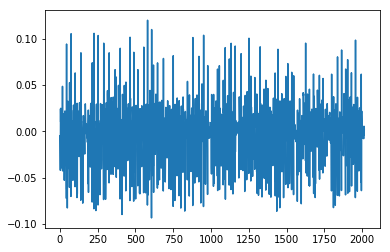

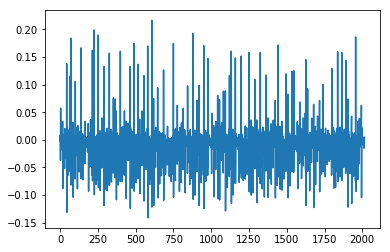

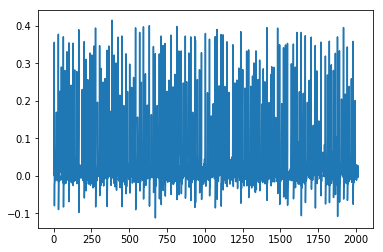

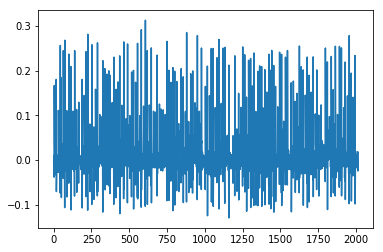

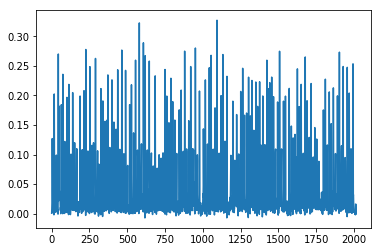

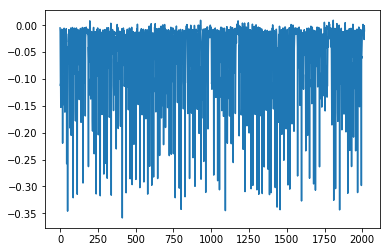

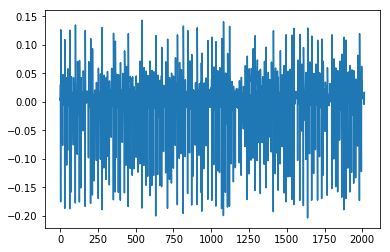

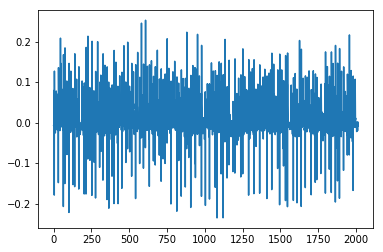

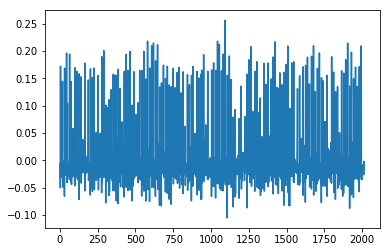

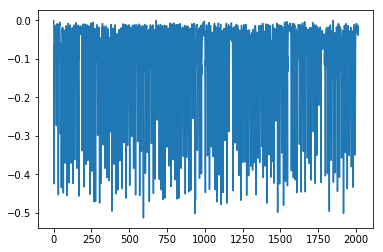

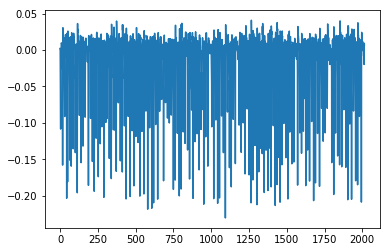

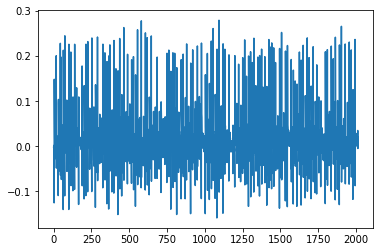

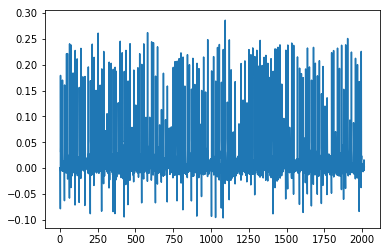

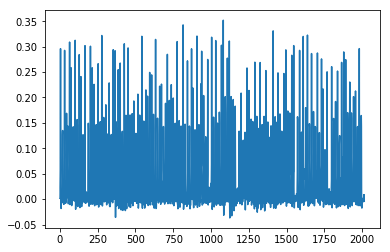

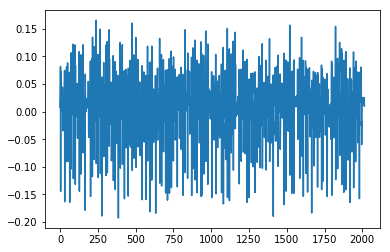

In [25]:
n_s = 0
plt.plot(X_lc_scaled_real[n_s])
plt.show()

for i in range(X_enc_lc_real.shape[-1]):
    plt.plot(X_enc_lc_real[n_s][:,i])
    plt.show()

In [18]:
#X_train = X_enc_lc_real[mask_train]
X_train = np.concatenate([X_enc_lc_real[mask_train[:]], X_enc_lc_aug[mask_train[:]]], axis=0)
X_test = X_enc_lc_real[mask_test]

Y_train = 1*(all_labels=="CONFIRMED")[mask_train].values
if Y_train.shape[0] != X_train.shape[0]:
    Y_train = np.tile(Y_train, (2))
    
Y_test  = 1*(all_labels=="CONFIRMED")[mask_test].values

print("X train shape: ",X_train.shape)
print("X test shape: ",X_test.shape)
print("Y train shape: ",Y_train.shape)
print("Y test shape: ",Y_test.shape)

X train shape:  (8678, 2015, 128)
X test shape:  (1918, 2015, 128)
Y train shape:  (8678,)
Y test shape:  (1918,)


### Define Encoder-Metadata

In [19]:
import keras
from keras.models import Sequential
from keras.layers import *
import tensorflow as tf

def train_model(model,X,y,epochs=1,batch_size=32, val_split=0.0, verb=1, val_data=None):
    if val_split == 0:
        return model.fit(X,y, epochs=epochs, batch_size=batch_size, validation_data=val_data, verbose=verb)
    else:
        return model.fit(X,y, epochs=epochs, batch_size=batch_size, validation_split=val_split, verbose=verb)

In [20]:
class KMaxPooling(keras.engine.Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension). TensorFlow backend.
    """
    def __init__(self, k=1, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = keras.engine.InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.k, input_shape[2])

    def call(self, inputs):
        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1]) 
        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0] 
        return tf.transpose(top_k, [0, 2, 1])

import math
def K_l(L,seq_len,k_top,layer=1): #dinamyc k-max
    return max(k_top, math.ceil( seq_len*(L-layer)/L) )

def add_conv_bloq(model, filters, kernel_s, BN=False, drop=0,padding='same',dil_r=1):
    model.add(Conv1D(filters, kernel_s, strides=1, padding=padding, activation='relu',dilation_rate=dil_r))
    if BN:
        model.add(BatchNormalization())
    if dil_r == 1:
        model.add(Conv1D(filters, kernel_s, strides=1, padding=padding, activation='relu',dilation_rate=dil_r))
        if BN:
            model.add(BatchNormalization())
    if drop != 0:
        model.add(Dropout(drop))

#build model functions..
def build_simple_model(inp_shape, units, L =1, drop=0):
    model = Sequential()
    model.add(GlobalAveragePooling1D(input_shape=inp_shape))
    for l in range(L):
        model.add(Dense(units, activation='relu'))
        units = int(units/2)
        if drop > 0.0:
            model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_cnn_model(inp_shape, units, L=1, kernel_s =10,
                        pool=5,BN=False,conv_pool=False,drop=0,padding='same',dil_r=1 ): #parametros estructurales
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for _ in range(L):
        add_conv_bloq(model, units, kernel_s, BN=BN,drop=drop,padding=padding,dil_r=dil_r)
        if pool!= 0 and dil_r ==1:
            if conv_pool:
                model.add(Conv1D(filters, kernel_s, strides=pool, padding='valid'))
                if BN:
                    model.add(BatchNormalization())
            else:
                #model.add(MaxPool1D(pool_size=pool, strides=pool, padding='valid'))
                model.add(AveragePooling1D(pool_size=pool, strides=pool, padding='valid'))

        if dil_r != 1:
            dil_r = int(dil_r*2)
        else:
            units = int(units*2)
            
    if dil_r != 1:
        model.add(Lambda(lambda x: x[:, -1, :])) # o dejar el global
    else:
        model.add(GlobalAveragePooling1D())
    
    model.add(Dense(64,activation='relu'))
    if BN:
        model.add(BatchNormalization())
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_kpool_model(inp_shape, units, L=1,kernel_s =10, K_top=500,
                        BN = False, drop=0, padding='same'): #parametros estructurales
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for l in range(L):
        add_conv_bloq(model, units, kernel_s, BN=BN,drop=drop,padding=padding)

        model.add(KMaxPooling(k = K_l(L, inp_shape[0], K_top, layer=l+1)))
        units = int(units*2)
    
    model.add(GlobalAveragePooling1D())  #u otra cosa
    
    model.add(Dense(64,activation='relu'))
    if BN:
        model.add(BatchNormalization())
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_rnn_model(inp_shape, units, layers=1, bid=False, gru=True, drop=0):
    #que achique las unidades?
    model = Sequential()
    model.add(InputLayer(input_shape=inp_shape))
    for i in range(layers):
        if gru:
            layer_rec = GRU(units, return_sequences=(i < layers - 1))
        else:
            layer_rec = LSTM(units, return_sequences=(i < layers - 1))            
        if bid:
            layer_rec = Bidirectional(layer_rec)
        
        model.add(layer_rec)
        if drop > 0.0:
            model.add(Dropout(drop))
    model.add(Dense(64,activation='relu'))
    if drop>0:
        model.add(Dropout(drop))
    model.add(Dense(1, activation='sigmoid'))
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling1d_2 ( (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 24,833
Trainable params: 24,833
Non-trainable params: 0
_________________________________________________________________
Train 

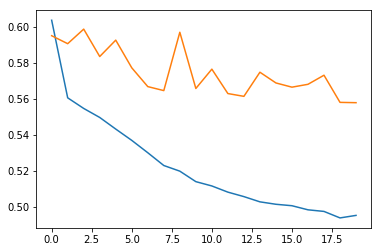

In [30]:
model_simple = build_simple_model(X_train.shape[1:], 128, L =2, drop=0.25)
model_simple.compile(loss='binary_crossentropy', optimizer='adam')
model_simple.summary()

hist = train_model(model_simple, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
gru_1 (GRU)                  (None, 2015, 64)          37056     
_________________________________________________________________
dropout_5 (Dropout)          (None, 2015, 64)          0         
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
__________

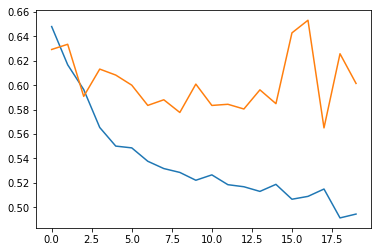

In [32]:
model_gru = build_rnn_model(X_train.shape[1:], 64, layers=2, bid=False, gru=True, drop=0.2)
model_gru.compile(loss='binary_crossentropy', optimizer='adam')
model_gru.summary()
hist = train_model(model_gru, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )

plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 2011, 32)          20512     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 2007, 32)          5152      
_________________________________________________________________
k_max_pooling_1 (KMaxPooling (None, 1344, 32)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1340, 64)          10304     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1336, 64)          20544     
_________________________________________________________________
k_max_pooling_2 (KMaxPooling (None, 672, 64)           0         
__________

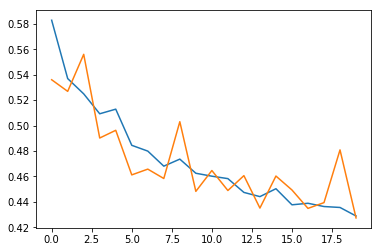

In [23]:
#version 1
model_kpool = build_kpool_model(X_train.shape[1:], 32, L=3,
                        kernel_s =5, K_top=80, BN = False, drop=0., padding='valid') #menos k??
model_kpool.compile(loss='binary_crossentropy', optimizer='adam')
model_kpool.summary()

hist = train_model(model_kpool, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 2011, 16)          10256     
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 2007, 16)          1296      
_________________________________________________________________
k_max_pooling_4 (KMaxPooling (None, 1344, 16)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 1340, 32)          2592      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1336, 32)          5152      
_________________________________________________________________
k_max_pooling_5 (KMaxPooling (None, 672, 32)           0         
__________

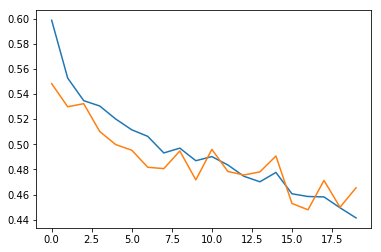

In [25]:
#version 2
model_kpool2 = build_kpool_model(X_train.shape[1:], 16, L=3,
                        kernel_s =5, K_top=100, BN = False, drop=0., padding='valid') #menos k??
model_kpool2.compile(loss='binary_crossentropy', optimizer='adam')
model_kpool2.summary()

hist = train_model(model_kpool2, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 2011, 32)          20512     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2007, 32)          5152      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_1 (Average (None, 669, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 665, 64)           10304     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 661, 64)           20544     
__________

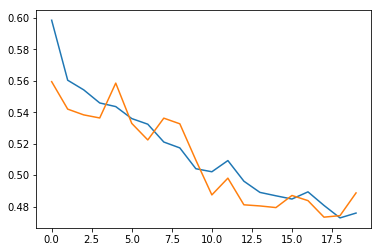

In [21]:
model_cnn = build_cnn_model(X_train.shape[1:],  32, L=3, 
                        kernel_s =5, pool=3, BN=False, drop=0.2,padding='valid',dil_r=1 )
model_cnn.compile(loss='binary_crossentropy', optimizer='adam')
model_cnn.summary()

hist = train_model(model_cnn, X_train, Y_train, epochs=50, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 2011, 32)          20512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 2011, 32)          128       
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 2007, 32)          5152      
_________________________________________________________________
batch_normalization_8 (Batch (None, 2007, 32)          128       
_________________________________________________________________
dropout_20 (Dropout)         (None, 2007, 32)          0         
_________________________________________________________________
average_pooling1d_10 (Averag (None, 669, 32)           0         
__________

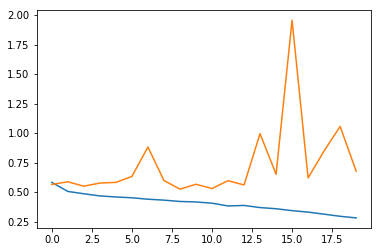

In [44]:
## con bn??
model_cnn = build_cnn_model(X_train.shape[1:],  32, L=3, 
                        kernel_s =5, pool=3, BN=True, drop=0.2,padding='valid',dil_r=1 )
model_cnn.compile(loss='binary_crossentropy', optimizer='adam')
model_cnn.summary()

hist = train_model(model_cnn, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 2015, 128)         0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 2008, 32)          32800     
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 2001, 32)          8224      
_________________________________________________________________
dropout_24 (Dropout)         (None, 2001, 32)          0         
_________________________________________________________________
k_max_pooling_7 (KMaxPooling (None, 1344, 32)          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 1337, 64)          16448     
_________________________________________________________________
conv1d_40 (Conv1D)           (None, 1330, 64)          32832     
__________

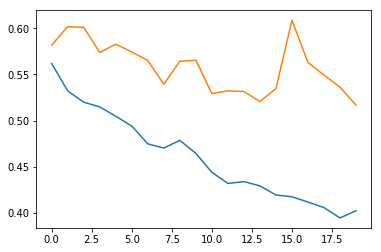

In [45]:
#version 1
model_kpool = build_kpool_model(X_train.shape[1:], 32, L=3,
                        kernel_s =8, K_top=80, BN = False, drop=0.25, padding='valid') #menos k??
model_kpool.compile(loss='binary_crossentropy', optimizer='adam')
model_kpool.summary()

hist = train_model(model_kpool, X_train, Y_train, epochs=20, batch_size=64*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 2011, 32)          20512     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 670, 32)           0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 666, 64)           10304     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 222, 64)           0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 218, 128)          41088     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 72, 128)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 128)               98688     
__________

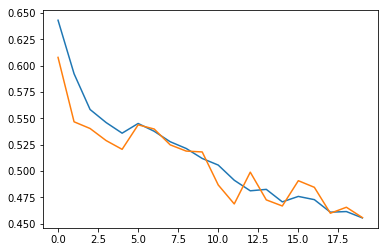

In [32]:
## uno hecho por mi.. cnn + recurrente

model = Sequential()

#mas pool?
model.add(Conv1D(32, 5, activation='relu', input_shape=X_train.shape[1:]))
#model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Conv1D(64, 5, activation='relu'))
#model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(GRU(128, return_sequences=True)) #sacar?
#model.add(SimpleRNN(128, return_sequences = True))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(GRU(128, return_sequences=False))
#model.add(SimpleRNN(128, return_sequences = False))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

#model.add(Dense(32, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

hist = train_model(model, X_train, Y_train, epochs=20, batch_size=128*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.700306  0.762252  0.836559     0.741225       0.756319   
Confirmed       0.700306  0.762252  0.564054     0.741225       0.786667   

                Recall raw  
False Positive    0.935846  
Confirmed         0.439642

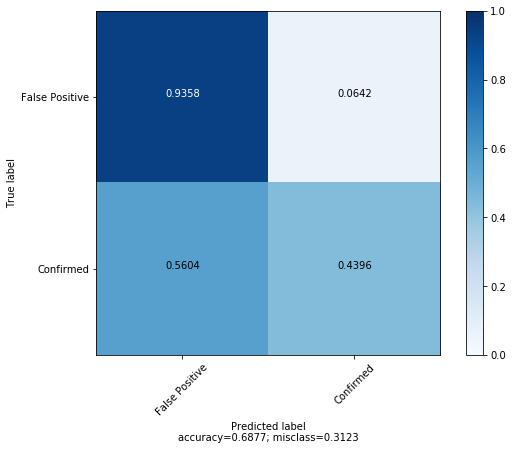

In [33]:
Y_test_hat = model.predict_classes(X_test, batch_size=256)

print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

### Con Simple enves de GRU

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 2011, 128)         163968    
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 670, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 666, 128)          82048     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 222, 128)          0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total para

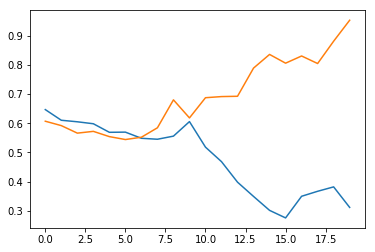

In [23]:
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool1D(3))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))

model.add(SimpleRNN(128, return_sequences = False))
#model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

hist = train_model(model, X_train, Y_train, epochs=20, batch_size=128*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.537904  0.629301  0.743414     0.599621       0.675853   
Confirmed       0.537904  0.629301  0.332394     0.599621       0.449239   

                Recall raw  
False Positive    0.825982  
Confirmed         0.263785

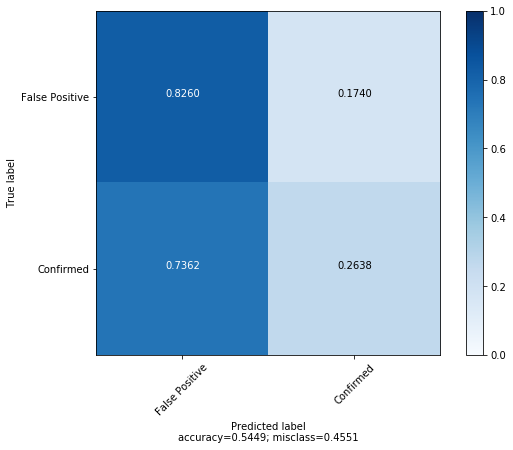

In [24]:
Y_test_hat = model.predict_classes(X_test, batch_size=256)

print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

### Tres capas conv

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 2011, 128)         163968    
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 670, 128)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 670, 128)          0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 666, 128)          82048     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 222, 128)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 222, 128)          0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 218, 128)          82048     
__________

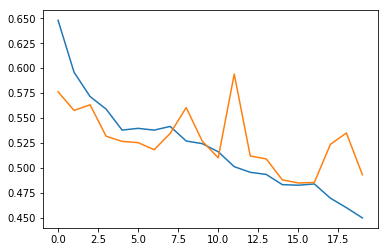

In [29]:
model = Sequential()

model.add(Conv1D(128, 5, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool1D(3))
model.add(Dropout(0.25))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.25))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.25))

model.add(SimpleRNN(128, return_sequences = False))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

hist = train_model(model, X_train, Y_train, epochs=20, batch_size=128*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.660812  0.735662  0.820149     0.708663       0.735369   
Confirmed       0.660812  0.735662  0.501475     0.708663       0.736994   

                Recall raw  
False Positive    0.927025  
Confirmed         0.380030

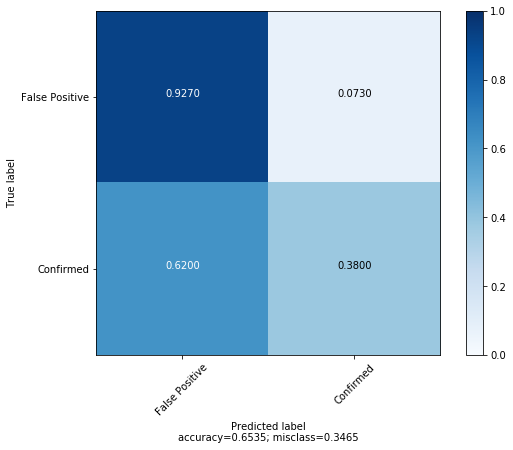

In [30]:
Y_test_hat = model.predict_classes(X_test, batch_size=256)

print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

### Dos capas RNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 2011, 128)         163968    
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 670, 128)          0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 666, 128)          82048     
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 222, 128)          0         
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 222, 128)          32896     
_________________________________________________________________
dropout_11 (Dropout)         (None, 222, 128)          0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 128)               32896     
__________

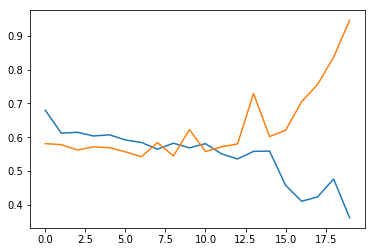

In [31]:
model = Sequential()
model.add(Conv1D(128, 5, activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool1D(3))

model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPool1D(3))

model.add(SimpleRNN(128, return_sequences = True))
model.add(Dropout(0.5))

model.add(SimpleRNN(128, return_sequences = False))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.summary()

hist = train_model(model, X_train, Y_train, epochs=20, batch_size=128*2, val_data=(X_test,Y_test) )
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.show()

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.558448  0.642336  0.750908     0.616246       0.686131   
Confirmed       0.558448  0.642336  0.365989     0.616246       0.481752   

                Recall raw  
False Positive    0.829190  
Confirmed         0.295082

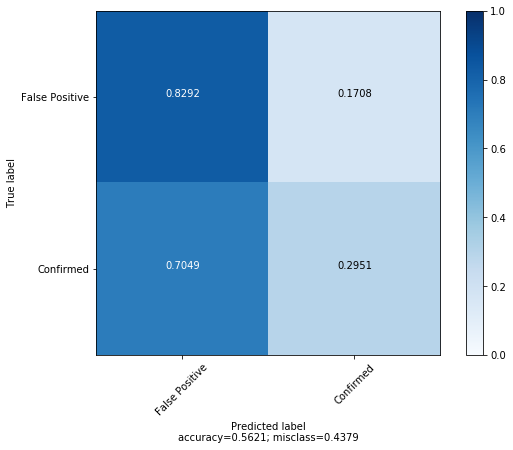

In [32]:
Y_test_hat = model.predict_classes(X_test, batch_size=256)

print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

In [ ]:
### pol de 2...

## Evaluate

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.645455  0.681789  0.758955     0.685705       0.779324   
Confirmed       0.645455  0.681789  0.531955     0.685705       0.506261   

                Recall raw  
False Positive    0.739623  
Confirmed         0.560396

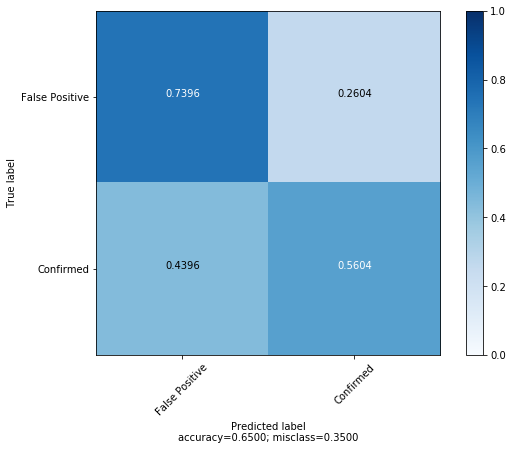

In [31]:
##simple
#Y_train_hat = model_simple.predict_classes(X_train, batch_size=256)
Y_test_hat = model_simple.predict_classes(X_test, batch_size=256)

#print("Train")
#aux = calculate_metrics(Y_train, Y_train_hat)
print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.613593  0.628754  0.690133     0.640736       0.793865   
Confirmed       0.613593  0.628754  0.537052     0.640736       0.449333   

                Recall raw  
False Positive    0.610377  
Confirmed         0.667327

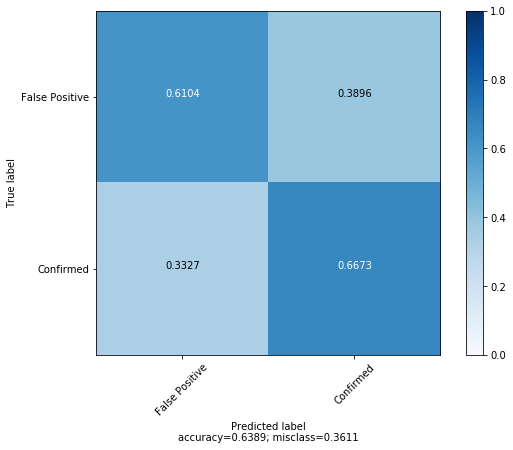

In [33]:
##RNN -- pre encoder
#Y_train_hat = model_gru.predict_classes(X_train, batch_size=256)
Y_test_hat = model_gru.predict_classes(X_test, batch_size=256)

#print("Train")
#aux = calculate_metrics(Y_train, Y_train_hat)
print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive   0.73464  0.770594  0.832317     0.763974       0.793028   
Confirmed        0.73464  0.770594  0.636964     0.763974       0.713494   

                Recall raw  
False Positive    0.875702  
Confirmed         0.575261

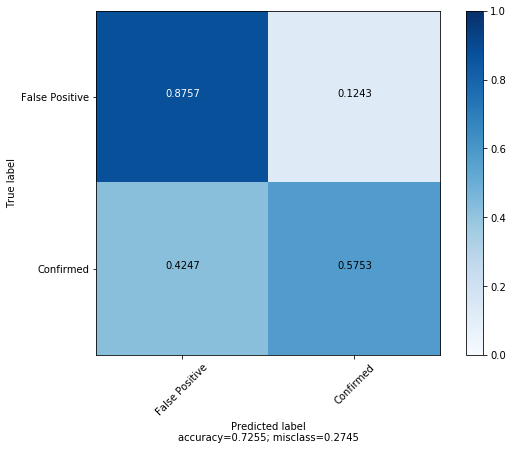

In [24]:
#KPool1
#Y_train_hat = model_kpool.predict_classes(X_train, batch_size=256)
Y_test_hat = model_kpool.predict_classes(X_test, batch_size=256)

#print("Train")
#aux = calculate_metrics(Y_train, Y_train_hat)
print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive   0.74081  0.749739  0.788918     0.755257       0.873418   
Confirmed        0.74081  0.749739  0.692702     0.755257       0.607183   

                Recall raw  
False Positive    0.719326  
Confirmed         0.806259

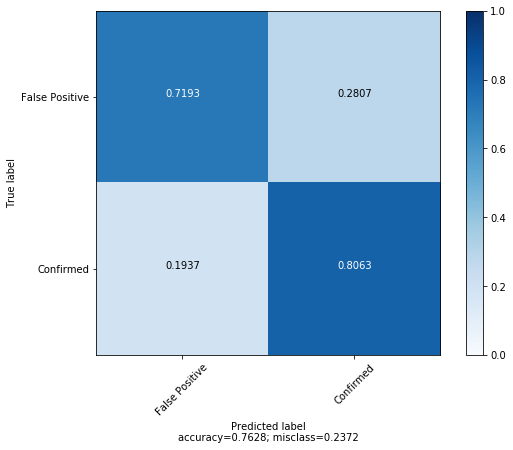

In [26]:
#KPool2
#Y_train_hat = model_kpool2.predict_classes(X_train, batch_size=256)
Y_test_hat = model_kpool2.predict_classes(X_test, batch_size=256)

#print("Train")
#aux = calculate_metrics(Y_train, Y_train_hat)
print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 

Test


F1 macro  F1 micro    F1 raw  F1 weighted  Precision raw  \
False Positive  0.715143  0.725235  0.768758     0.731245       0.848837   
Confirmed       0.715143  0.725235  0.661529     0.731245       0.581264   

                Recall raw  
False Positive    0.702486  
Confirmed         0.767511

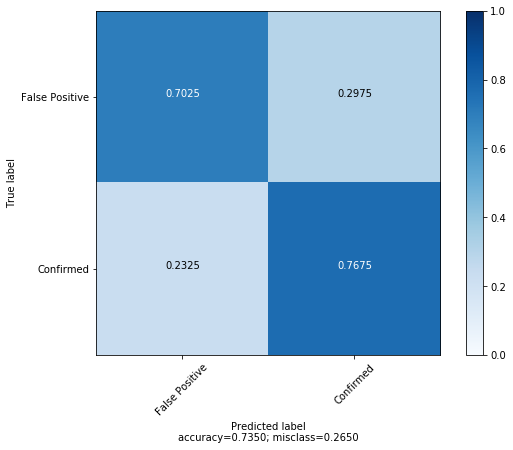

In [22]:
#CNN
#Y_train_hat = model_cnn.predict_classes(X_train, batch_size=256)
Y_test_hat = model_cnn.predict_classes(X_test, batch_size=256)

#print("Train")
#aux = calculate_metrics(Y_train, Y_train_hat)
print("Test")
aux = calculate_metrics(Y_test, Y_test_hat) 